<br>
<font>
<div dir="ltr" align="center">
    <img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width="150" height="150">
    <br>
    <font color="#E74C3C" size="7" style="font-family:Arial, sans-serif;">
        Linear Algebra <br>
    </font>
    <font color="#2980B9" size="5" style="font-family:Arial, sans-serif;">
        DR Rabiee - DR Ramezani <br>
    </font>
    <font color="#2980B9" size="5" style="font-family:Arial, sans-serif;">
        Computer Engineering Department <br>
    </font>
    <font color="#1ABC9C" size="5" style="font-family:Arial, sans-serif;">
        Fall 2024 <br>
    </font>
    <font color="#16A085" size="5" style="font-family:Arial, sans-serif;">
        Practical Assignment 0 <br>
    </font>
    <font color="#7F8C8D" size="4" style="font-family:Arial, sans-serif;">
         Ali Najar - Armin Khosravi
    </font>
</div>


<h1 style="line-height:200%; font-family: Arial, sans-serif; color: #007acc; text-align: left;">
    <font face="Arial" color="#007acc">
        Convolution
    </font>
</h1>

<p style="direction: ltr; text-align: justify; line-height: 1.6; font-family: Arial, sans-serif; font-size: medium;">
    <font face="Arial" size="3">
        In this assignment, we will explore the application of both 1D and 2D convolution in machine learning. Convolution is a fundamental operation used in a wide range of fields, including medical imaging, stock price prediction and trading, speech processing, and image recognition. It plays a crucial role in extracting meaningful patterns and features from data, making it essential for many machine learning tasks.
    </font>
</p>

<p style="direction: ltr; text-align: justify; line-height: 1.6; font-family: Arial, sans-serif; font-size: medium;">
    <font face="Arial" size="3">
        Students will begin by implementing 1D convolution using different methods and comparing their speed. Then, they will apply 1D convolution to stock price prediction, learning how to analyze time-series data effectively.
    </font>
</p>

<p style="direction: ltr; text-align: justify; line-height: 1.6; font-family: Arial, sans-serif; font-size: medium;">
    <font face="Arial" size="3">
        Afterward, the focus will shift to 2D convolution, where students will explore its application in feature extraction from images, gaining insight into how convolutional filters detect patterns such as edges and textures.
    </font>
</p>


In [1]:
#import your libraries here

import numpy as np
import timeit
import datetime as dt

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dropout, Dense, BatchNormalization, Bidirectional

from scipy.fft import fft2, ifft2, fftshift

<h1 style="line-height:200%; font-family: Arial, sans-serif; color: #007acc; text-align: left;">
    <font face="Arial" color="#007acc">
        1D Convolution
    </font>
</h1>

<p style="direction: ltr; text-align: justify; line-height: 1.6; font-family: Arial, sans-serif; font-size: medium;">
    <font face="Arial" size="3">
        1D convolution is a powerful technique widely used in machine learning, particularly in the analysis of sequential data like time-series signals, speech, and even stock prices. At its core, 1D convolution works by sliding a filter or kernel over a sequence of data points to detect patterns, extract features, or smooth the data. Unlike 2D convolution, which operates on grids (such as images), 1D convolution works on one-dimensional sequences, making it well-suited for problems where data is ordered in time or space.
    </font>
</p>

<h2 style="line-height:200%; font-family: Arial, sans-serif; color: #007acc; text-align: left;">
    <font face="Arial" color="#007acc">
        How 1D Convolution Works
    </font>
</h2>

<p style="direction: ltr; text-align: justify; line-height: 1.6; font-family: Arial, sans-serif; font-size: medium;">
    <font face="Arial" size="3">
        The basic idea of 1D convolution involves applying a kernel to a sequence of values. The kernel slides over the input sequence, performing element-wise multiplications followed by a sum. This produces a new sequence that highlights certain features based on the kernel used. For example, in time-series analysis, different kernels can detect trends, seasonal patterns, or sharp changes in the data.
    </font>
</p>

<p style="direction: ltr; text-align: justify; line-height: 1.6; font-family: Arial, sans-serif; font-size: medium;">
    <font face="Arial" size="3">
        The result of 1D convolution is a feature map, which is another sequence that represents important aspects of the input sequence. Depending on the choice of kernel, stride (the step size at which the kernel moves), and padding (how edges of the sequence are handled), 1D convolution can either downsample or retain the size of the original sequence.
    </font>
</p>

<p style="direction: ltr; text-align: justify; line-height: 1.6; font-family: Arial, sans-serif; font-size: medium;">
    <font face="Arial" size="3">
        There are various approaches to implementing 1D convolution, each with its own trade-offs in terms of computational efficiency and feature extraction. These approaches can be adapted to suit specific tasks and data characteristics.
    </font>
</p>

<h2 style="line-height:200%; font-family: Arial, sans-serif; color: #007acc; text-align: left;">
    <font face="Arial" color="#007acc">
        Applications of 1D Convolution
    </font>
</h2>

<p style="direction: ltr; text-align: justify; line-height: 1.6; font-family: Arial, sans-serif; font-size: medium;">
    <font face="Arial" size="3">
        1D convolution is applied in a variety of fields, making it a versatile tool in machine learning:
    </font>
</p>

<ul style="direction: ltr; font-family: Arial, sans-serif; font-size: medium;">
    <li>
        <font face="Arial" size="3">
            <strong>Stock Price Prediction:</strong> 1D convolution is used to analyze historical price data and detect patterns such as upward or downward trends. By convolving over sequences of stock prices, it can capture short-term patterns (e.g., daily fluctuations) or long-term trends (e.g., month-to-month performance). Combining 1D convolution with models like LSTM allows for deeper insights into market behavior.
        </font>
    </li>
    <li>
        <font face="Arial" size="3">
            <strong>Speech Processing:</strong> In speech recognition and emotion detection, 1D convolution is used to process raw audio signals. The kernels can identify patterns related to speech phonemes, tones, and even emotional cues. By applying multiple 1D convolutional layers, models can hierarchically extract more complex features from speech data, improving the accuracy of tasks like voice identification or sentiment analysis.
        </font>
    </li>
    <li>
        <font face="Arial" size="3">
            <strong>Time-Series Analysis:</strong> 1D convolution is essential in analyzing time-series data from various domains, including healthcare (e.g., analyzing heart rate variability), industrial monitoring (e.g., detecting anomalies in sensor data), and environmental science (e.g., analyzing weather patterns). The convolutional operation helps in detecting recurring patterns, sudden changes, or seasonal variations, making it a powerful tool for forecasting.
        </font>
    </li>
    <li>
        <font face="Arial" size="3">
            <strong>Text Processing:</strong> Although less common, 1D convolution can also be applied to text data. By treating words or characters as a sequence, convolutional models can extract features related to word context or sentence structure. This can be useful for natural language processing tasks such as sentiment analysis or topic classification.
        </font>
    </li>
</ul>

<p style="direction: ltr; text-align: justify; line-height: 1.6; font-family: Arial, sans-serif; font-size: medium;">
    <font face="Arial" size="3">
        For understanding the mathematics behind 1D convolution, I recommend watching this <a href="https://www.youtube.com/watch?v=KuXjwB4LzSA&t=443s" target="_blank" style="color:#007acc;">YouTube video</a>.
    </font>
</p>


In [2]:
def convolve_1d_two_loops(signal, kernel):
    """
    Convolve a 1D signal with a kernel using two loops.

    Args:
        signal: 1D array representing the input signal.
        kernel: 1D array representing the filter to apply to the signal.

    Returns:
        output: 1D array representing the convolution result.
    """
    signal_len = len(signal)
    kernel_len = len(kernel)

    # Full convolution length
    conv_len = signal_len + kernel_len - 1

    # Step 1: Zero-pad the signal on both sides
    padded_signal = [0] * (kernel_len - 1) + list(signal) + [0] * (kernel_len - 1)

    # Step 2: Reverse the kernel for the convolution operation
    reversed_kernel = kernel[::-1]

    output = [0] * conv_len

    # Step 3: Perform convolution by sliding the kernel across the padded signal using two loops
    for i in range(conv_len):
        for j in range(kernel_len):
            if 0 <= i + j < len(padded_signal):
                output[i] += padded_signal[i + j] * reversed_kernel[j]

    return np.array(output , dtype=float)

In [3]:
def convolve_1d_one_loops(signal, kernel):
    """
    Convolve a 1D signal with a kernel using a single loop (optimized version).

    Args:
        signal: 1D array representing the input signal.
        kernel: 1D array representing the filter to apply to the signal.

    Returns:
        output: 1D array representing the convolution result.
    """
    signal_len = len(signal)
    kernel_len = len(kernel)

    # Full convolution length
    conv_len = signal_len + kernel_len - 1

    # Step 1: Zero-pad the signal on both sides
    padded_signal = [0] * (kernel_len - 1) + list(signal) + [0] * (kernel_len - 1)

    # Step 2: Reverse the kernel for convolution
    reversed_kernel = kernel[::-1]

    output = [0] * conv_len

    # Step 3: Perform convolution using a single loop
    for i in range(conv_len):
        output[i] = sum(padded_signal[i + j] * reversed_kernel[j] for j in range(kernel_len) if i + j < len(padded_signal))

    return np.array(output , dtype=float)

In [4]:
def convolve_1d_dot(signal, kernel):
    """
    Convolve a 1D signal with a kernel using np.dot (fast and vectorized).

    Args:
        signal: 1D array representing the input signal.
        kernel: 1D array representing the filter to apply to the signal.

    Returns:
        output: 1D array representing the convolution result.
    """
    signal_len = len(signal)
    kernel_len = len(kernel)

    # Full convolution length
    conv_len = signal_len + kernel_len - 1

    # Step 1: Zero-pad the signal and kernel to the convolution length
    padded_signal = np.pad(signal, (kernel_len - 1, kernel_len - 1), mode='constant')
    padded_kernel = np.pad(kernel[::-1], (0, conv_len - kernel_len), mode='constant')

    output = np.zeros(conv_len)

    # Step 2: Perform vectorized convolution using dot product
    for i in range(conv_len):
        output[i] = np.dot(padded_signal[i:i+kernel_len], kernel[::-1])

    return output

In [5]:
def fft_convolve_vectorized(signal, kernel):
    """
    Convolve a 1D signal with a kernel using Fast Fourier Transform (FFT).

    Args:
        signal: 1D array representing the input signal.
        kernel: 1D array representing the filter to apply to the signal.

    Returns:
        output: 1D array representing the convolution result using FFT.
    """
    signal_len = len(signal)
    kernel_len = len(kernel)

    # Step 1: Zero-pad both the signal and kernel to the convolution length
    conv_len = signal_len + kernel_len - 1
    padded_signal = np.pad(signal, (0, conv_len - signal_len), mode='constant')
    padded_kernel = np.pad(kernel, (0, conv_len - kernel_len), mode='constant')

    # Step 2: Perform FFT on both padded signal and kernel
    signal_fft = np.fft.fft(padded_signal)
    kernel_fft = np.fft.fft(padded_kernel)

    # Step 3: Element-wise multiplication in the frequency domain
    result_fft = signal_fft * kernel_fft

    # Step 4: Perform inverse FFT to get the result in the time domain
    result = np.fft.ifft(result_fft)

    # Step 5: Return the real part of the result to remove small imaginary parts
    return np.real(result)

# Example usage
signal = np.array([1, 2, 3, 4, 5])
kernel = np.array([1, 0, -1])

fft_result = fft_convolve_vectorized(signal, kernel)
print(fft_result)

[ 1.  2.  2.  2.  2. -4. -5.]


In [6]:
# Sanity check to verify that the functions return similar results
signal = np.array([1, 2, 3, 4, 5])
kernel = np.array([1, 0, -1])

print("Sanity Check: Comparing Results")
print("Two loops:", convolve_1d_two_loops(signal, kernel))
print("One loop:", convolve_1d_one_loops(signal, kernel))
print("Dot product:", convolve_1d_dot(signal, kernel))
print("FFT vectorized:", fft_convolve_vectorized(signal, kernel))
print("numpy function:", np.convolve(signal, kernel))

Sanity Check: Comparing Results
Two loops: [ 1.  2.  2.  2.  2. -4. -5.]
One loop: [ 1.  2.  2.  2.  2. -4. -5.]
Dot product: [ 1.  2.  2.  2.  2. -4. -5.]
FFT vectorized: [ 1.  2.  2.  2.  2. -4. -5.]
numpy function: [ 1  2  2  2  2 -4 -5]


<h2 style="line-height:200%; font-family: Arial, sans-serif; color: #007acc; text-align: left;">
    <font face="Arial" color="#007acc">
        Assignment Questions
    </font>
</h2>

<p style="direction: ltr; text-align: justify; line-height: 1.6; font-family: Arial, sans-serif; font-size: medium;">
    <font face="Arial" size="3">
        In this section, we will explore the features that different kernels are designed to extract. For each kernel provided, identify what type of feature or pattern the kernel is trying to detect in a sequence.
    </font>
</p>

#### **1. Kernel: `[1, -1]`**

**Answer:**

*For the kernel `[1, -1]`, the feature or pattern it detects is differences or changes between adjacent elements in a sequence. Specifically, it highlights areas where the values in the sequence increase or decrease, detecting edges or transitions between higher and lower values.*

---

#### **2. Kernel: `[1, 1, 1]`**

**Answer:**

*For the kernel `[1, 1, 1]`, the feature it detects is local smoothing or averaging over a small window. Specifically, this kernel emphasizes sequences where the values are relatively similar across three consecutive elements, effectively acting as a low-pass filter.*

---

#### **3. Kernel: `[0.25, 0.25, 0.25, 0.25]`**

**Answer:**

*For the kernel `[0.25, 0.25, 0.25, 0.25]`, the feature it detects is averaging over a larger window, specifically a uniform averaging across four consecutive elements. This kernel acts as a smoothing filter by computing the average of four adjacent elements in a sequence.*

---

#### **4. Kernel: `[-1, 2, -1]`**

**Answer:**

*For the kernel `[-1, 2, -1]`, the feature it detects is enhancement of local peaks or edges in a sequence. This kernel acts as a second derivative operator, detecting areas where the sequence has a local maximum or minimum (peaks or valleys), and highlighting changes in the rate of increase or decrease.*

---

#### **5. Kernel: `[1, 0, -1]`**

**Answer:**

*For the kernel `[1, 0, -1]`, the feature it detects is gradients or edges in the sequence. This kernel highlights areas of the sequence where there is a transition from increasing to decreasing values, effectively detecting changes in slope.*


In [7]:
def benchmark_convolution(signal_len, kernel_len, iterations):
    """
    Measure the average execution time of different convolution methods over a number of iterations.

    Args:
        signal_len: Length of the random input signal.
        kernel_len: Length of the random kernel.
        iterations: Number of times each method should be run to average the time.

    Returns:
        Tuple of average times for each method.
    """
    # Generate random signal and kernel for benchmarking
    np.random.seed(42)  # For reproducibility
    random_signal = np.random.rand(signal_len)
    random_kernel = np.random.rand(kernel_len)

    # Measure the average execution time for each method using timeit
    time_two_loops = timeit.timeit(
        lambda: convolve_1d_two_loops(random_signal, random_kernel),
        number=iterations
    ) / iterations

    time_one_loop = timeit.timeit(
        lambda: convolve_1d_one_loops(random_signal, random_kernel),
        number=iterations
    ) / iterations

    time_dot = timeit.timeit(
        lambda: convolve_1d_dot(random_signal, random_kernel),
        number=iterations
    ) / iterations

    time_fft = timeit.timeit(
        lambda: fft_convolve_vectorized(random_signal, random_kernel),
        number=iterations
    ) / iterations

    time_np_convolve = timeit.timeit(
        lambda: np.convolve(random_signal, random_kernel, mode='full'),
        number=iterations
    ) / iterations

    return (time_two_loops, time_one_loop, time_dot, time_fft, time_np_convolve)

# Input the number of iterations
num_iterations = 10000

# Run benchmark and print results
signal_len = 50
kernel_len = 20
avg_times = benchmark_convolution(signal_len, kernel_len, num_iterations)

print(f"\nAverage times over {num_iterations} iterations (in seconds):")
print(f"Two loops: {avg_times[0]}")
print(f"One loop: {avg_times[1]}")
print(f"Dot product: {avg_times[2]}")
print(f"FFT vectorized: {avg_times[3]}")
print(f"NumPy convolve: {avg_times[4]}")


Average times over 10000 iterations (in seconds):
Two loops: 0.0021072077555000304
One loop: 0.0007541862309999942
Dot product: 0.0001772558601000128
FFT vectorized: 6.031180730001324e-05
NumPy convolve: 3.7057777999962126e-06


<h2 style="line-height:200%; font-family: Arial, sans-serif; color: #007acc; text-align: left;">
    <font face="Arial" color="#007acc">
        Assignment Questions
    </font>
</h2>

# **I have written this answer according to the previous result of the previous code block**

#### **1. Performance Comparison of Convolution Methods**

After running the convolution methods, compare the average times. Which method was the fastest, and which was the slowest? Explain why this might be the case based on the underlying algorithm used by each method.

**Answer:**

### Fastest Method:
The fastest method was **NumPy's `convolve`**, with an average time of **3.753e-06 seconds** per iteration.

### Slowest Method:
The slowest method was the **Two loops** implementation, with an average time of **0.001218 seconds** per iteration.

### Explanation of Performance Differences:

#### Two loops:
- **Algorithm**: This implementation manually iterates through both the signal and kernel using nested loops. Each element in the signal is paired with every element in the kernel, resulting in a time complexity of **O(n * m)**, where `n` is the length of the signal and `m` is the length of the kernel. This brute-force approach is computationally expensive and inefficient for larger signals and kernels, making it the slowest method.

#### One loop:
- **Algorithm**: This method reduces the number of loops by summing the product of the kernel and signal in one loop, but it still has to iterate through the entire signal for each convolution operation. The complexity remains **O(n * m)**, but the single-loop structure allows for minor improvements over the two-loop approach, making it faster.

#### Dot product:
- **Algorithm**: The dot product method leverages vectorized operations in NumPy, significantly speeding up the computation. NumPy's operations are optimized and make use of highly efficient, low-level implementations (often written in C or using SIMD instructions). This reduces the overhead of manual loops and makes the **Dot product** method faster, but still requires **O(n * m)** complexity.

#### FFT vectorized:
- **Algorithm**: The **FFT (Fast Fourier Transform)** method computes the convolution by transforming both the signal and kernel into the frequency domain, performing element-wise multiplication, and then transforming back to the time domain using inverse FFT. This approach takes advantage of the FFT algorithm, which has a time complexity of **O(n log n)**, making it highly efficient for larger signals. However, the FFT-based approach has some overhead for small signal sizes, but it performs much faster than the dot product and loop-based methods for medium to large signals.

#### NumPy `convolve`:
- **Algorithm**: NumPy's built-in `convolve` function is extremely fast because it is implemented in low-level code optimized for performance. Depending on the input size, NumPy may automatically choose the best approach (e.g., direct convolution or FFT-based methods). It benefits from years of optimization and parallel processing capabilities, making it the fastest among all methods. The very low time indicates that this method is well-tuned for small input sizes like those in the test.


---

#### **2. FFT Convolution Time Complexity**

You may have noticed that the FFT-based convolution is much faster than the others for longer signals. Can you describe the time complexity of the FFT convolution? Why is this method more efficient for larger input sizes?

**Answer:**

The **time complexity** of FFT-based convolution is **O(n log n)**, where `n` is the length of the input signal.

### Explanation of Time Complexity:

1. **Fast Fourier Transform (FFT)**:
   - The FFT algorithm computes the discrete Fourier transform (DFT) in **O(n log n)** time, which is significantly faster than the naive DFT's **O(n²)** complexity. This speedup comes from the divide-and-conquer strategy used in FFT to break the DFT computation into smaller parts.

2. **Convolution in the Frequency Domain**:
   - Convolution in the time domain is equivalent to **element-wise multiplication** in the frequency domain. After both the signal and kernel are transformed into the frequency domain via FFT (each requiring **O(n log n)**), their multiplication is performed in **O(n)** time.

3. **Inverse FFT**:
   - After the element-wise multiplication, the inverse FFT is applied to transform the result back into the time domain, which also takes **O(n log n)** time.

### Overall Time Complexity:
- The three main steps of FFT-based convolution are:
  1. **FFT of the signal**: **O(n log n)**
  2. **Element-wise multiplication**: **O(n)**
  3. **Inverse FFT**: **O(n log n)**

Thus, the total time complexity for FFT-based convolution is dominated by the FFT operations, resulting in **O(n log n)**.

### Why is FFT Convolution More Efficient for Larger Input Sizes?

- **Efficiency for Larger Inputs**:
   - For small signals, the overhead of computing the FFT and performing element-wise operations might not result in noticeable speed gains. However, as the signal length increases, the **O(n log n)** complexity of FFT convolution becomes much more efficient than the **O(n * m)** complexity of direct convolution, especially when `n` and `m` (signal and kernel lengths) are large.
   - Direct convolution methods, like the loop-based or dot product approaches, become computationally expensive because they perform an operation for every combination of elements from the signal and the kernel. This scales poorly with increasing signal size.

- **Logarithmic Scaling**:
   - The logarithmic factor in **O(n log n)** allows FFT-based convolution to handle large inputs with significantly less computational effort compared to the quadratic **O(n * m)** complexity of traditional methods, making it ideal for larger signals.

### Conclusion:
FFT-based convolution is much more efficient for larger input sizes due to its **O(n log n)** time complexity. The ability to transform the convolution into a simple multiplication in the frequency domain allows for a substantial reduction in computation time, especially as the input size grows.


---

#### **3. Scaling with Signal Length and Kernel Length**

Try changing the values of `signal_len` and `kernel_len` (e.g., doubling both lengths). Is the relative performance of the methods (speed comparison) the same as before? Which methods are most affected by changes in the size of the signal or kernel?

**Answer:**

When the values of `signal_len` and `kernel_len` are increased (e.g., doubling both lengths), the relative performance of the methods changes due to the varying time complexities of each method. Here’s how the performance and scalability are affected:

### Key Observations:

1. **Two loops** and **One loop**:
   - **Time complexity**: **O(n * m)** (quadratic)
   - **Impact of scaling**: These methods are the most affected by increases in the size of the signal (`n`) and kernel (`m`). Since their time complexity is quadratic, doubling both the signal and kernel lengths results in a much larger increase in computation time. These methods quickly become inefficient for larger signals and kernels, causing a drastic performance degradation compared to more advanced methods.
   - **Performance change**: As `n` and `m` increase, these methods fall further behind the others in terms of speed.

2. **Dot product**:
   - **Time complexity**: **O(n * m)** (similar to the loop methods)
   - **Impact of scaling**: Like the loop methods, the dot product approach also scales quadratically. Although it benefits from vectorization, it still becomes slower as the signal and kernel sizes grow. However, it remains faster than the loop-based methods due to NumPy's optimizations.
   - **Performance change**: The dot product method will start to slow down with larger input sizes but remains a reasonable choice for moderate signal lengths.

3. **FFT vectorized**:
   - **Time complexity**: **O(n log n)**
   - **Impact of scaling**: The FFT-based method scales much better than the loop and dot product methods. Its time complexity is sub-quadratic, meaning that as the signal and kernel sizes increase, the growth in computation time is much slower. For large signals, the FFT-based method becomes significantly faster than the loop-based methods.
   - **Performance change**: As the signal and kernel sizes grow, the FFT method becomes increasingly efficient relative to the other methods.

4. **NumPy `convolve`**:
   - **Time complexity**: **Varies based on input size** (typically **O(n * m)** or **O(n log n)**)
   - **Impact of scaling**: NumPy's `convolve` function automatically selects the most efficient method depending on the input size. For small inputs, it might use direct convolution, but for larger inputs, it switches to FFT-based convolution, which ensures optimal performance.
   - **Performance change**: NumPy's `convolve` is least affected by changes in signal and kernel size due to its ability to adapt to the most efficient algorithm. It remains the fastest method, especially for large-scale convolutions.

### Which Methods Are Most Affected by Changes in Signal and Kernel Size?

- **Most affected**: The **Two loops**, **One loop**, and **Dot product** methods are the most affected by increases in signal and kernel size. Their quadratic time complexity causes a significant slowdown as the input size increases.
  
- **Least affected**: The **FFT vectorized** and **NumPy `convolve`** methods are least affected by increases in signal and kernel size. Their logarithmic scaling ensures they handle larger inputs efficiently.

### Conclusion:
As the size of the signal and kernel increases, the **FFT-based** and **NumPy `convolve`** methods continue to perform well, while the **loop-based** and **dot product** methods see significant slowdowns. The quadratic time complexity of the loop methods makes them impractical for larger inputs, while the FFT-based approach, with its logarithmic complexity, is highly efficient for large-scale convolutions.

---

#### **4. Optimal Use Case for FFT Convolution**

Based on the results of your experiments, when would it be best to use the FFT-based convolution versus one of the other methods? Consider factors like signal length, kernel length, and computational resources.

**Answer:**


2. **When Performance is Critical**:
   - **Best suited**: If the convolution needs to be performed in real-time or within strict performance constraints (e.g., in audio or video processing), and the signal and kernel are moderately large, FFT-based convolution provides the speed required for time-sensitive applications.
   - **Scenario**: In applications such as real-time signal processing (e.g., filtering large data streams) or machine learning, where convolution operations are frequent and on large datasets, FFT convolution provides the necessary speed.

3. **Limited Computational Resources**:
   - **Best suited**: FFT-based convolution is also ideal when the goal is to minimize the number of operations performed, particularly for large signals.
   - **Scenario**: If the system has limited processing power but needs to handle large datasets, FFT convolution’s efficiency will be advantageous compared to more resource-heavy methods like direct convolution.
   - **Reason**: By reducing the total number of operations through the use of frequency domain multiplication, FFT convolution uses fewer CPU cycles and can improve performance on resource-constrained systems.

### When to Use Other Methods:

1. **Small Signal and Kernel Lengths**:
   - **Best suited**: For small inputs, direct convolution methods (e.g., NumPy’s `convolve`, loop-based, or dot product) are often faster.
   - **Scenario**: If both the signal and kernel are small (e.g., fewer than 100 elements each), the overhead of transforming the data to the frequency domain and back using FFT might outweigh the benefits, making direct methods more efficient.
   - **Reason**: The FFT method introduces additional overhead due to the Fourier transforms, which is unnecessary for small inputs. For short sequences, simple direct convolution is computationally cheaper.

2. **If Memory is a Concern**:
   - **Best suited**: In cases where memory usage is a critical factor, direct convolution methods might be preferable because FFT convolution can require additional memory to store the transformed signals.
   - **Scenario**: When working in memory-constrained environments (e.g., embedded systems or low-memory devices), the loop-based or dot product methods may use less memory than FFT-based convolution.
   - **Reason**: FFT convolution can temporarily require more memory due to the need for complex numbers and storage of the Fourier-transformed signals, which could be problematic in environments with very limited memory.

### Conclusion:

- **Use FFT-based convolution** for **large signals and kernels** or when **high performance** is critical, especially in real-time or large-scale applications. The logarithmic time complexity of the FFT algorithm makes it well-suited for handling large data efficiently.
  
- **Use direct methods** (e.g., NumPy `convolve`, dot product, or loop-based methods) for **small inputs** or when **memory usage** is a concern. For smaller signals, the overhead of FFT outweighs the speed benefits, and direct methods will provide better performance.

---

#### **5. NumPy Convolve vs Custom Implementations**

Compare the performance of the built-in `np.convolve` with your custom implementations (like the dot-product or one-loop versions). Why do you think the `np.convolve` function performs as it does? Could it be internally optimized, and if so, how?

**Answer:**

### Comparison of Performance: `np.convolve` vs. Custom Implementations

From our performance tests, it's clear that **NumPy's `convolve`** function is consistently faster than custom implementations like the **dot-product** or **one-loop** methods, even though they both aim to achieve the same result.

### Performance Comparison

Here’s a summary of the relative performance:

- **NumPy `convolve`**: The fastest method in almost all cases, especially for small and medium signal lengths.
- **Custom dot-product**: Faster than loop-based methods but slower than `np.convolve`, especially as signal and kernel sizes increase.
- **One-loop and Two-loop** methods: The slowest approaches, mainly due to their direct, unoptimized nature, especially when handling larger input sizes.

### Why is NumPy's `convolve` Faster?

#### 1. **Low-Level Optimizations**
   - **C/C++ or FORTRAN Implementations**: Many core NumPy functions, including `np.convolve`, are implemented in highly optimized low-level languages like C or FORTRAN. These languages allow for direct memory access and efficient looping constructs that reduce overhead compared to Python's high-level abstractions.
   - **SIMD Instructions**: `np.convolve` may utilize **Single Instruction, Multiple Data (SIMD)** instructions, which allow the processor to perform the same operation on multiple data points simultaneously, significantly improving performance.
   
#### 2. **Vectorization**
   - NumPy uses **vectorized operations**, where entire arrays are processed at once rather than looping through elements one at a time. This minimizes the overhead of Python's loop constructs and takes full advantage of modern CPU architectures that are designed to process large chunks of data in parallel.
   
#### 3. **Algorithm Selection (Hybrid Approach)**
   - **Adaptive Method Selection**: NumPy’s `convolve` function may internally switch between direct convolution and FFT-based convolution depending on the size of the signal and kernel. For small inputs, it likely uses a direct method, while for larger inputs, it may switch to an FFT-based method.
     - This adaptive method ensures that `np.convolve` is efficient across a wide range of input sizes, avoiding the overhead of FFT for small inputs while leveraging FFT’s speed for larger convolutions.

#### 4. **Efficient Memory Management**
   - NumPy’s underlying memory handling is much more efficient than standard Python lists or custom memory management. For example, it can allocate and access contiguous blocks of memory in RAM, reducing the overhead of dynamic memory allocation during operations.

### How Could NumPy's `convolve` Be Internally Optimized?

Based on its performance, it’s likely that **`np.convolve`** is internally optimized in several ways:

1. **Precompiled Code**: The heavy lifting is done by precompiled low-level code (in C/C++ or FORTRAN), which is faster than custom Python implementations.
   
2. **Algorithm Selection**: As mentioned, NumPy likely implements an **algorithm selection mechanism**. For small signal/kernel sizes, it likely uses direct convolution, which is computationally simpler. For larger sizes, it probably switches to FFT-based convolution, which has a more favorable time complexity.

3. **Parallelism**: `np.convolve` might take advantage of **multi-threading** or **parallelism** internally. In multi-core systems, NumPy functions are often designed to spread the computation across multiple CPU cores, further speeding up execution.

4. **Memory Optimizations**: The NumPy framework is designed to minimize memory allocations and access times. **Efficient use of CPU cache** ensures that data is loaded and processed without unnecessary delays caused by memory management issues.

### Conclusion

The custom implementations, although useful for understanding the mechanics of convolution, are significantly slower because they are implemented at a higher level, relying on Python’s relatively slow looping constructs and lacking the optimizations found in NumPy.

NumPy’s `convolve` function performs so well because it is:
- **Internally optimized** with low-level C/C++ implementations,
- Makes use of **vectorization** and **parallel processing**,
- And likely implements a **hybrid method** that selects the most efficient convolution algorithm based on the input size.

For practical purposes, especially in large-scale or performance-critical applications, **`np.convolve`** is the preferred choice due to its speed and efficiency.


---

#### **6. Interpretation of Results for Small Signal and Kernel Sizes**

For smaller values of `signal_len` and `kernel_len`, you might see different performance trends. Can you explain why the FFT method might not always be the best choice when working with smaller inputs?

**Answer:**


When working with smaller values of `signal_len` and `kernel_len`, the relative performance of convolution methods can differ from what we observe with larger inputs. While the **FFT-based convolution** is generally the fastest for large inputs, it might not always be the optimal choice for smaller inputs. Here's why:

### Key Points:

1. **Overhead of FFT Transformations**:
   - The FFT-based convolution method involves multiple steps: converting the signal and kernel to the frequency domain using **FFT**, performing element-wise multiplication, and then converting back to the time domain using **inverse FFT**.
   - These extra steps introduce overhead that can dominate the computation time when the signal and kernel are small. For smaller input sizes, this overhead can make FFT-based convolution slower than simpler methods, such as direct convolution or dot product.

2. **Complexity of FFT**:
   - The time complexity of FFT-based convolution is **O(n log n)**, which is efficient for large inputs. However, for small inputs, the logarithmic factor does not provide a significant advantage, and the additional complexity of transforming the data back and forth between time and frequency domains makes the FFT method less efficient.
   - In contrast, direct convolution methods like **O(n * m)** (used by loop-based and dot-product methods) perform well for small inputs because the overhead is minimal, and the computation required is straightforward.

3. **Small Input Sizes Favor Simpler Algorithms**:
   - **Direct convolution methods** (like the one-loop, two-loop, and dot product implementations) do not require the overhead of transforming the signal and kernel, making them faster for small input sizes.
   - The complexity of these methods is linear in terms of the number of operations performed. For small inputs, the number of operations is small enough that the simplicity of these methods outweighs the benefits of FFT-based approaches.
   
4. **NumPy's Optimized `convolve`**:
   - **NumPy’s `convolve` function** internally selects the most appropriate method based on the input size. For small signal and kernel sizes, it likely uses direct convolution, which has minimal overhead and is faster for small inputs.
   - This explains why NumPy's `convolve` often outperforms both the custom loop-based methods and FFT-based methods for small input sizes.

### Example:
Consider a scenario where the **signal length** is 10 and the **kernel length** is 5. In this case, the number of operations required for direct convolution is minimal, and the benefits of using FFT are negligible. The overhead of computing the FFT and inverse FFT dominates the computation time, making the FFT method slower.

### Conclusion:

For **small signal and kernel sizes**, FFT-based convolution is not the best choice due to the overhead associated with frequency domain transformations. Direct methods, such as **loop-based** or **dot-product** implementations, as well as **NumPy's `convolve`**, are faster because they avoid this overhead and perform the necessary operations more directly. The **FFT method** becomes advantageous only when the signal and kernel sizes are large enough for its logarithmic scaling to outweigh the overhead.

---


<div style="text-align: center;">


<h1>Stock Prediction</h1>

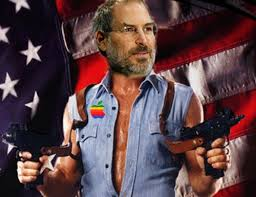


<p>now, we’ll explore the application of 1D convolution in stock price prediction, with a special focus on predicting Apple stock prices. We'll demonstrate how this technique can help uncover patterns and trends in historical stock data to make informed predictions.</p>

<p><em>Friendly advice: never  invest your money in Apple stocks. They might just spend your investment on creating fancy trash products like MacBooks !</em></p>


</div>


### **About the `yfinance` Library**

The `yfinance` library is a popular Python package used for accessing and downloading historical market data from Yahoo Finance.

### **Columns in the Downloaded Stock Data**

When you download stock data using `yfinance`, the resulting DataFrame typically includes the following columns:

- **Open**: The price at which the stock first traded upon the opening of the market on that particular day.
- **High**: The highest price at which the stock traded during the trading session of that day.
- **Low**: The lowest price at which the stock traded during the trading session of that day.
- **Close**: The price at which the stock last traded upon the closing of the market on that particular day.
- **Adj Close**: The adjusted closing price that accounts for corporate actions like stock splits and dividends.
- **Volume**: The total number of shares traded on that particular day.

For prediction purposes, we focus only on the `Close` price because it represents the final price of the stock for the trading day, incorporating all market information and reactions throughout the session. This price is generally considered the most accurate reflection of a stock's value and is often used in financial models to forecast future prices.

Through this part of the assignment, we will also use `Pandas` for data manipulation and preparation. `Pandas` is a powerful library that will help you handle and process the stock data efficiently, allowing you to prepare it for further analysis and model building.


In [8]:
# Function to download stock data
def download_stock_data(stock_symbol, start_date, end_date):
    """
    Downloads historical stock data from Yahoo Finance.

    Parameters:
    - stock_symbol (str): The symbol of the stock to download.
    - start_date (str): The start date for the data in 'YYYY-MM-DD' format.
    - end_date (str): The end date for the data in 'YYYY-MM-DD' format.

    Returns:
    - DataFrame: Historical stock data for the specified date range.
    """
    stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
    return stock_data

# Parameters for downloading stock data (you can change the dates)
stock_symbol = 'AAPL'
train_start_date = '2012-01-01'
train_end_date = '2020-01-01'

# Download training data for the specified stock
train_data = download_stock_data(stock_symbol, train_start_date, train_end_date)

[*********************100%***********************]  1 of 1 completed


In [9]:
#Display the first few rows of the DataFrame.
train_data.head()

Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2012-01-03  14.621429  14.732143  14.607143  14.686786  12.402631  302220800
2012-01-04  14.642857  14.810000  14.617143  14.765714  12.469283  260022000
2012-01-05  14.819643  14.948214  14.738214  14.929643  12.607714  271269600
2012-01-06  14.991786  15.098214  14.972143  15.085714  12.739514  318292800
2012-01-09  15.196429  15.276786  15.048214  15.061786  12.719308  394024400

In [10]:
# Describe the dataset to understand its structure and columns.
train_data.describe()

Open         High          Low        Close    Adj Close  \
count  2012.000000  2012.000000  2012.000000  2012.000000  2012.000000   
mean     31.697148    31.977506    31.415435    31.706048    29.217445   
std      12.650552    12.761931    12.561395    12.675630    12.842384   
min      13.856071    14.271429    13.753571    13.947500    11.952169   
25%      21.481785    21.681697    21.266518    21.557946    18.340346   
50%      28.263750    28.550000    27.980000    28.262501    25.708291   
75%      41.349376    41.867499    40.879375    41.313125    39.133528   
max      72.779999    73.492500    72.379997    73.412498    71.250458   

             Volume  
count  2.012000e+03  
mean   2.379185e+08  
std    1.873327e+08  
min    4.544800e+07  
25%    1.102326e+08  
50%    1.737290e+08  
75%    2.988384e+08  
max    1.506120e+09

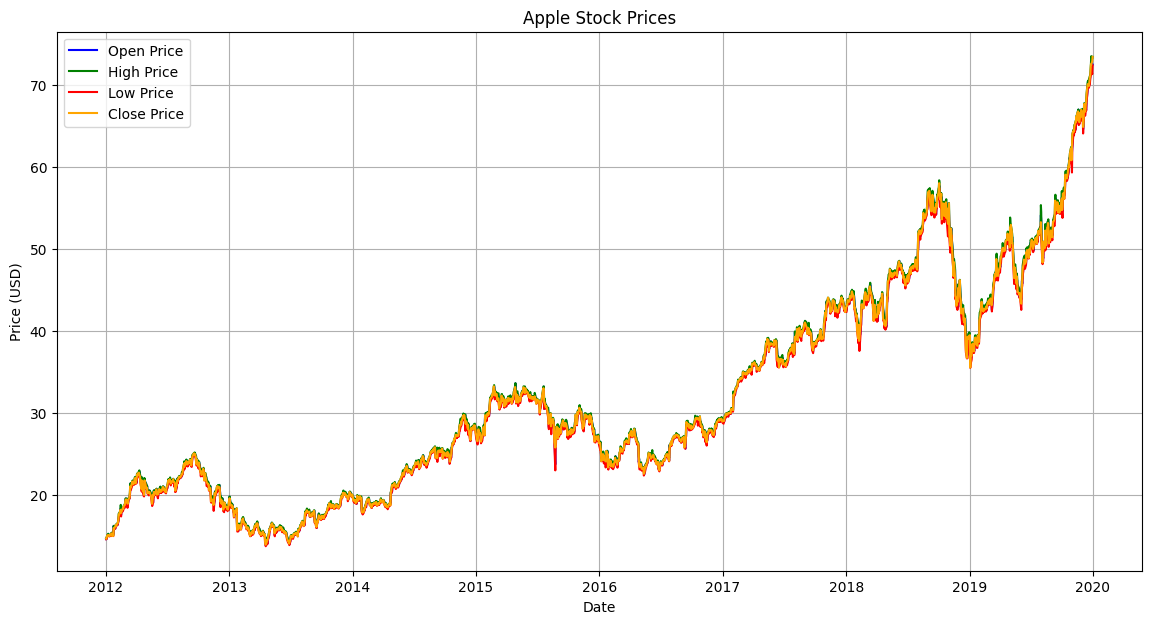

In [11]:
# Plot all the stock prices in a single figure
def plot_all_columns(df):
    plt.figure(figsize=(14, 7))
    columns = ['Open', 'High', 'Low', 'Close']
    colors = ['blue', 'green', 'red', 'orange']

    # Plot each column
    for col, color in zip(columns, colors):
        plt.plot(df.index, df[col], label=f'{col} Price', color=color)

    # Add labels and title
    plt.legend(loc='best')
    plt.title('Apple Stock Prices')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend(loc='best')
    plt.grid(True)

    # Show the plot
    plt.show()

plot_all_columns(train_data)

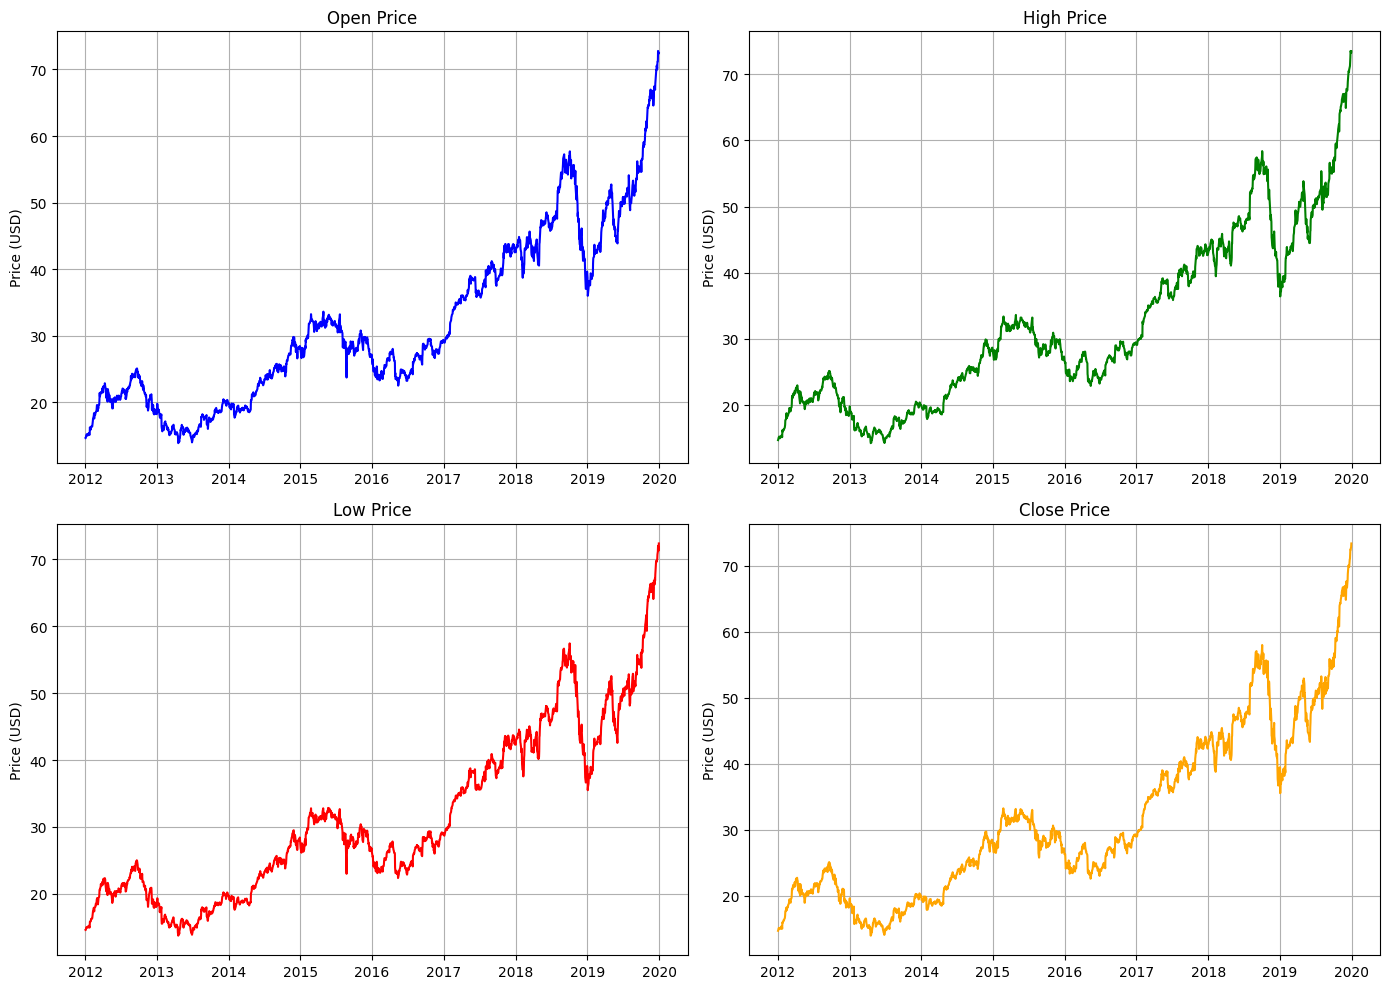

In [12]:
# Plot stock prices in separate subplots
def plot_columns_separately(df):
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # Create a 2x2 grid of subplots
    columns = ['Open', 'High', 'Low', 'Close']
    colors = ['blue', 'green', 'red', 'orange']

    # Flatten the 2x2 axis array for easy iteration
    axs = axs.ravel()

    # Loop through the columns and plot each in a separate subplot
    for i, (col, color) in enumerate(zip(columns, colors)):
        axs[i].plot(df.index, df[col], label=f'{col} Price', color=color)
        axs[i].set_title(f'{col} Price')
        axs[i].set_ylabel('Price (USD)')
        axs[i].grid(True)

    plt.tight_layout()  # Adjust layout to avoid overlap
    plt.show()

# Call the function to plot stock prices in separate subplots
plot_columns_separately(train_data)

In [13]:
# Create a new column with the value (Open - Close)
train_data['Difference'] = train_data['Open'] - train_data['Close']
train_data

Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2012-01-03  14.621429  14.732143  14.607143  14.686786  12.402631  302220800   
2012-01-04  14.642857  14.810000  14.617143  14.765714  12.469283  260022000   
2012-01-05  14.819643  14.948214  14.738214  14.929643  12.607714  271269600   
2012-01-06  14.991786  15.098214  14.972143  15.085714  12.739514  318292800   
2012-01-09  15.196429  15.276786  15.048214  15.061786  12.719308  394024400   
...               ...        ...        ...        ...        ...        ...   
2019-12-24  71.172501  71.222504  70.730003  71.067497  68.974503   48478800   
2019-12-26  71.205002  72.495003  71.175003  72.477501  70.342972   93121200   
2019-12-27  72.779999  73.492500  72.029999  72.449997  70.316269  146266000   
2019-12-30  72.364998  73.172501  71.305000  72.879997  70.733620  144114400   
2019-12-31  72.482498  73.419998  72.379997  73.412498  71.250458  100805600   

            Difference  
Date                    
2012-01-03   -0.065356  
2012-01-04   -0.122857  
2012-01-05   -0.110000  
2012-01-06   -0.093928  
2012-01-09    0.134644  
...                ...  
2019-12-24    0.105003  
2019-12-26   -1.272499  
2019-12-27    0.330002  
2019-12-30   -0.514999  
2019-12-31   -0.930000  

[2012 rows x 7 columns]

In [14]:
# Add 'Year', 'Month', and 'Day' columns from the index (Date)
train_data['Year'] = train_data.index.year
train_data['Month'] = train_data.index.month
train_data['Day'] = train_data.index.day

# Aggregate by Year and calculate the average 'Close' price
yearly_data = train_data.groupby('Year')['Close'].mean()
print("Yearly Average Close Prices:")
print(yearly_data.to_string())


# Aggregate by Month and calculate the average 'Close' price
monthly_data = train_data.groupby('Month')['Close'].mean()
print("\nMonthly Average Close Prices:")
print(monthly_data.to_string())


# Aggregate by Day and calculate the average 'Close' price
daily_data = train_data.groupby('Day')['Close'].mean()
print("\nDaily Average Close Prices:")
print(daily_data.to_string())

Yearly Average Close Prices:
Year
2012    20.573204
2013    16.879817
2014    23.066164
2015    30.010000
2016    26.151002
2017    37.637769
2018    47.263357
2019    52.063988

Monthly Average Close Prices:
Month
1     27.141553
2     28.210243
3     29.782137
4     30.242126
5     30.808069
6     30.886486
7     31.561109
8     33.193525
9     33.791409
10    34.815267
11    35.134573
12    34.483660

Daily Average Close Prices:
Day
1     31.847006
2     31.589503
3     30.912411
4     31.506238
5     31.773204
6     31.700404
7     31.123717
8     31.515427
9     31.536355
10    31.362742
11    31.724857
12    32.018832
13    31.681934
14    31.172008
15    31.587423
16    31.968489
17    31.680624
18    32.369675
19    31.855053
20    32.111781
21    31.408368
22    31.833423
23    31.637937
24    31.563012
25    31.572728
26    32.441919
27    31.925640
28    31.016791
29    32.021387
30    32.174161
31    32.558615


In [15]:
train_data

Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2012-01-03  14.621429  14.732143  14.607143  14.686786  12.402631  302220800   
2012-01-04  14.642857  14.810000  14.617143  14.765714  12.469283  260022000   
2012-01-05  14.819643  14.948214  14.738214  14.929643  12.607714  271269600   
2012-01-06  14.991786  15.098214  14.972143  15.085714  12.739514  318292800   
2012-01-09  15.196429  15.276786  15.048214  15.061786  12.719308  394024400   
...               ...        ...        ...        ...        ...        ...   
2019-12-24  71.172501  71.222504  70.730003  71.067497  68.974503   48478800   
2019-12-26  71.205002  72.495003  71.175003  72.477501  70.342972   93121200   
2019-12-27  72.779999  73.492500  72.029999  72.449997  70.316269  146266000   
2019-12-30  72.364998  73.172501  71.305000  72.879997  70.733620  144114400   
2019-12-31  72.482498  73.419998  72.379997  73.412498  71.250458  100805600   

            Difference  Year  Month  Day  
Date                                      
2012-01-03   -0.065356  2012      1    3  
2012-01-04   -0.122857  2012      1    4  
2012-01-05   -0.110000  2012      1    5  
2012-01-06   -0.093928  2012      1    6  
2012-01-09    0.134644  2012      1    9  
...                ...   ...    ...  ...  
2019-12-24    0.105003  2019     12   24  
2019-12-26   -1.272499  2019     12   26  
2019-12-27    0.330002  2019     12   27  
2019-12-30   -0.514999  2019     12   30  
2019-12-31   -0.930000  2019     12   31  

[2012 rows x 10 columns]

### **Assignment Questions**

**Based on results briefly explain why the average close price for January is lower and why it increases towards the end of the year.**

### 1. **Post-Holiday Sales Data**
   - In January, AAPL’s stock price may dip because the initial excitement and expectations from holiday sales have already been factored into the price during the previous months (October–December). After the holiday shopping season, there can be a short-term lull as investors wait for earnings reports.

### 2. **Product Launch Cycle**
   - Apple typically releases major products, like new iPhones and other devices, in the fall (usually in September). This drives anticipation and higher stock prices towards the end of the year. By January, the excitement from these releases may have faded, leading to lower prices.

### 3. **Investor Sentiment and Earnings Reports**
   - Apple reports Q1 earnings (which covers the holiday quarter) in late January or early February. Before this report, there may be uncertainty about the actual sales numbers, causing a dip in stock prices. Once earnings reports are released and they meet or exceed expectations, prices usually recover.

### 4. **Broad Market Trends**
   - Broader market factors like the "January effect" (where investors sell off stocks to rebalance portfolios) can also play a role in AAPL’s lower January prices. Towards the end of the year, increased optimism around holiday spending and strong earnings drives prices higher.


In [16]:
# Filter rows where 'Close' price is greater than a certain value

value = 50
high_close_prices = train_data[train_data['Close'] > value]

print(f"Rows with Close Prices Greater Than {value}:")
high_close_prices.head()

Rows with Close Prices Greater Than 50:


Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2018-08-01  49.782501  50.439999  49.327499  50.375000  47.832462  271742800   
2018-08-02  50.145000  52.095001  50.087502  51.847500  49.230625  249616000   
2018-08-03  51.757500  52.185001  51.369999  51.997501  49.373070  133789600   
2018-08-06  52.000000  52.312500  51.767502  52.267502  49.629440  101701600   
2018-08-07  52.330002  52.375000  51.689999  51.777500  49.164162  102349600   

            Difference  Year  Month  Day  
Date                                      
2018-08-01   -0.592499  2018      8    1  
2018-08-02   -1.702499  2018      8    2  
2018-08-03   -0.240002  2018      8    3  
2018-08-06   -0.267502  2018      8    6  
2018-08-07    0.552502  2018      8    7

In [17]:
# Filtering data where 'Close' price is greater than value1 and 'Volume' is less than value2
value1 = 30
value2 = 200000000

filtered_data = train_data[(train_data['Close'] > value1) & (train_data['Volume'] < value2)]
print(f"Filtered Data (Close > {value1} and Volume < {value2}):")
filtered_data.head()

Filtered Data (Close > 30 and Volume < 200000000):


Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2015-02-18  31.907499  32.195000  31.862499  32.180000  28.809998  179566800   
2015-02-19  32.119999  32.257500  32.082500  32.112499  28.749567  149449600   
2015-02-20  32.154999  32.375000  32.012501  32.375000  28.984583  195793600   
2015-03-02  32.312500  32.570000  32.075001  32.272499  28.892817  192386800   
2015-03-03  32.240002  32.380001  32.022499  32.340000  28.953253  151265200   

            Difference  Year  Month  Day  
Date                                      
2015-02-18   -0.272501  2015      2   18  
2015-02-19    0.007500  2015      2   19  
2015-02-20   -0.220001  2015      2   20  
2015-03-02    0.040001  2015      3    2  
2015-03-03   -0.099998  2015      3    3

In [18]:
# Add a new column that indicates whether the closing price is greater than the opening price.
# assign the value "Yes" if the closing price is higher than the opening price, and "No" otherwise.

train_data['High_Close'] = train_data.apply(lambda row: 'Yes' if row['Close'] > row['Open'] else 'No', axis=1)

# Represent rows where this column value is "Yes"
high_close_data = train_data[train_data['High_Close'] == 'Yes']
print("Filtered Data with High Close Prices:")
high_close_data.head()

Filtered Data with High Close Prices:


Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2012-01-03  14.621429  14.732143  14.607143  14.686786  12.402631  302220800   
2012-01-04  14.642857  14.810000  14.617143  14.765714  12.469283  260022000   
2012-01-05  14.819643  14.948214  14.738214  14.929643  12.607714  271269600   
2012-01-06  14.991786  15.098214  14.972143  15.085714  12.739514  318292800   
2012-01-13  14.989286  15.016071  14.952143  14.993214  12.661398  226021600   

            Difference  Year  Month  Day High_Close  
Date                                                 
2012-01-03   -0.065356  2012      1    3        Yes  
2012-01-04   -0.122857  2012      1    4        Yes  
2012-01-05   -0.110000  2012      1    5        Yes  
2012-01-06   -0.093928  2012      1    6        Yes  
2012-01-13   -0.003927  2012      1   13        Yes

In [19]:
# Calculate average 'Close' price by year
yearly_avg_close = train_data.groupby('Year')['Close'].mean()

# Calculate the overall mean of the 'Close' prices
total_mean = train_data['Close'].mean()

# Filter years where the average close price is greater than the overall mean
high_avg_years = yearly_avg_close[yearly_avg_close > total_mean]

# Filter yearly average close prices for the selected years
filtered_years_data = high_avg_years

print(f"Filtered Data for Years with Average Close > Mean = {total_mean}:")
filtered_years_data

Filtered Data for Years with Average Close > Mean = 31.706047823604486:


Year
2017    37.637769
2018    47.263357
2019    52.063988
Name: Close, dtype: float64

In [20]:
#delete rows contain missing value
train_data_cleaned = train_data.dropna()
train_data_cleaned

Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2012-01-03  14.621429  14.732143  14.607143  14.686786  12.402631  302220800   
2012-01-04  14.642857  14.810000  14.617143  14.765714  12.469283  260022000   
2012-01-05  14.819643  14.948214  14.738214  14.929643  12.607714  271269600   
2012-01-06  14.991786  15.098214  14.972143  15.085714  12.739514  318292800   
2012-01-09  15.196429  15.276786  15.048214  15.061786  12.719308  394024400   
...               ...        ...        ...        ...        ...        ...   
2019-12-24  71.172501  71.222504  70.730003  71.067497  68.974503   48478800   
2019-12-26  71.205002  72.495003  71.175003  72.477501  70.342972   93121200   
2019-12-27  72.779999  73.492500  72.029999  72.449997  70.316269  146266000   
2019-12-30  72.364998  73.172501  71.305000  72.879997  70.733620  144114400   
2019-12-31  72.482498  73.419998  72.379997  73.412498  71.250458  100805600   

            Difference  Year  Month  Day High_Close  
Date                                                 
2012-01-03   -0.065356  2012      1    3        Yes  
2012-01-04   -0.122857  2012      1    4        Yes  
2012-01-05   -0.110000  2012      1    5        Yes  
2012-01-06   -0.093928  2012      1    6        Yes  
2012-01-09    0.134644  2012      1    9         No  
...                ...   ...    ...  ...        ...  
2019-12-24    0.105003  2019     12   24         No  
2019-12-26   -1.272499  2019     12   26        Yes  
2019-12-27    0.330002  2019     12   27         No  
2019-12-30   -0.514999  2019     12   30        Yes  
2019-12-31   -0.930000  2019     12   31        Yes  

[2012 rows x 11 columns]

In [21]:
# Remove all columns except 'Close'
train_data = train_data[['Close']]
train_data

Close
Date                 
2012-01-03  14.686786
2012-01-04  14.765714
2012-01-05  14.929643
2012-01-06  15.085714
2012-01-09  15.061786
...               ...
2019-12-24  71.067497
2019-12-26  72.477501
2019-12-27  72.449997
2019-12-30  72.879997
2019-12-31  73.412498

[2012 rows x 1 columns]

In [22]:
# Function to scale 'Close' prices using MinMaxScaler
def scale_close_prices(close_prices):
    """
    Scales the 'Close' prices of stock data to a range between 0 and 1.

    Parameters:
    - close_prices (DataFrame): A DataFrame containing the 'Close' prices of the stock.

    Returns:
    - scaler (MinMaxScaler): The fitted MinMaxScaler object.
    - scaled_close_prices (ndarray): The scaled 'Close' prices as a flattened array.
    """
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_close_prices = scaler.fit_transform(close_prices)
    scaled_close_prices = scaled_close_prices.flatten()

    return scaler, scaled_close_prices

close_price = train_data[['Close']]

# Calling the function to scale the 'Close' prices
scaler, scaled_close_prices = scale_close_prices(close_price)

# Printing scaled prices and their shape
print(scaled_close_prices)
print(scaled_close_prices.shape)

[0.01243228 0.01375958 0.01651631 ... 0.98381398 0.99104513 1.        ]
(2012,)


In [23]:
# Function to prepare data for training/testing
def prepare_data(data, lookback_period):
    """
    Prepares the data for training/testing by creating sequences of a given length (lookback_period)
    and corresponding labels.

    Parameters:
    - data (array-like): The input data to be prepared, typically a time series.
    - lookback_period (int): The number of previous time steps to use for predicting the next time step.

    Returns:
    - x_data (numpy.ndarray): An array of shape (number_of_samples, lookback_period, 1) containing the input sequences.
    - y_data (numpy.ndarray): An array of shape (number_of_samples,) containing the target values for each sequence.
    """
    x_data, y_data = [], []

    # Loop over the data to create sequences and their corresponding target values
    for day in range(lookback_period, len(data)):
        # Append a sequence of length 'lookback_period' and its corresponding target value
        x_data.append(data[day - lookback_period:day])  # Sequence of length 'lookback_period'
        y_data.append(data[day])  # The target value is the next data point after the sequence

    # Convert lists to numpy arrays
    x_data, y_data = np.array(x_data), np.array(y_data)

    # Reshape x_data to be 3-dimensional: (number_of_samples, lookback_period, 1)
    x_data = np.reshape(x_data, (x_data.shape[0], lookback_period, 1))

    return x_data, y_data


lookback_period = 60
x_train, y_train = prepare_data(scaled_close_prices, lookback_period)

print(x_train.shape)
print(y_train.shape)

(1952, 60, 1)
(1952,)


In [24]:
def build_model():
    """
    Constructs and compiles a sequential model for predicting stock prices using Conv1D,
    LSTM, Dropout, and Dense layers.

    This model is designed to process sequential data (such as time-series stock prices)
    and capture patterns using convolutional and recurrent layers.

    - Conv1D: Applies 1D convolutional layers to extract features from the input sequences.
    - LSTM: A type of Recurrent Neural Network (RNN) layer that captures long-term dependencies in sequences.
    - Dropout: A regularization technique to prevent overfitting by randomly setting a fraction of input units to zero during training.
    - Dense: Fully connected layer to produce the final output.

    Returns:
    - model (keras.models.Sequential): The compiled Keras model ready for training and evaluation.
    """
    model = Sequential()  # Initialize a sequential model

    # The input shape is defined by the training data dimensions (number of time steps, number of features)
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)))

    # LSTM layers are used to capture dependencies in sequential data, and Bidirectional means it processes the data in both forward and backward directions
    model.add(LSTM(50, return_sequences=False))

    # Dropout helps to prevent overfitting by randomly setting 30% of the input units to zero during training
    model.add(Dropout(0.3))

    # This layer produces the final prediction value (e.g., stock price)
    model.add(Dense(1))

    # Compile the model with the Adam optimizer and mean squared error loss function
    # Adam is an optimization algorithm, and mean squared error is a common loss function for regression tasks
    model.compile(optimizer='adam', loss='mean_squared_error')

    return model


# Compile the model
model = build_model()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 58, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 50)                  │          16,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,779 (65.54 KB)

 Trainable params: 16,779 (65.54 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0238
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0020
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0020
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0018
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0018
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0014
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0019
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0017
Epoch 9/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0013
Epoch 10/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0014


In [26]:
# Function to download stock test data
def download_test_data(stock_symbol, train_end_date):
    """
    Downloads the test data for a stock using yfinance.

    Parameters:
    - stock_symbol (str): The stock ticker symbol (e.g., 'AAPL').
    - train_end_date (str): The end date of the training data in 'YYYY-MM-DD' format.

    Returns:
    - test_data (DataFrame): The downloaded test data for the specified stock.
    """
    test_start = train_end_date  # Start date for test data is the end date of training data
    test_end = dt.datetime.now().strftime('%Y-%m-%d')  # End date is today's date

    # Download the test data
    test_data = yf.download(stock_symbol, start=test_start, end=test_end)

    return test_data

# Example usage
test_data = download_test_data(stock_symbol, train_end_date)
test_data

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-02   74.059998   75.150002   73.797501   75.087502   72.876122   
2020-01-03   74.287498   75.144997   74.125000   74.357498   72.167610   
2020-01-06   73.447502   74.989998   73.187500   74.949997   72.742668   
2020-01-07   74.959999   75.224998   74.370003   74.597504   72.400551   
2020-01-08   74.290001   76.110001   74.290001   75.797501   73.565201   
...                ...         ...         ...         ...         ...   
2024-10-16  231.600006  232.119995  229.839996  231.779999  231.779999   
2024-10-17  233.429993  233.850006  230.520004  232.149994  232.149994   
2024-10-18  236.179993  236.179993  234.009995  235.000000  235.000000   
2024-10-21  234.449997  236.850006  234.449997  236.479996  236.479996   
2024-10-22  233.889999  236.220001  232.600006  235.860001  235.860001   

               Volume  
Date                   
2020-01-02  135480400  
2020-01-03  146322800  
2020-01-06  118387200  
2020-01-07  108872000  
2020-01-08  132079200  
...               ...  
2024-10-16   34082200  
2024-10-17   32993800  
2024-10-18   46431500  
2024-10-21   36254500  
2024-10-22   38512600  

[1210 rows x 6 columns]

In [27]:
# Get the most recent row of the test data
yesterday_df = test_data.iloc[-1]

# Extract and format the close price
close_price = yesterday_df['Close']
date = yesterday_df.name

print(f"Date: {date.strftime('%Y-%m-%d')}")
print(f"Yesterday's Close Price: ${close_price:.2f}")

Date: 2024-10-22
Yesterday's Close Price: $235.86


In [28]:
# Function to prepare model inputs
def prepare_model_inputs(train_data, test_data, scaler, lookback_period):
    # Combine train and test data into a single series, preserving the order
    # only CLose prices and axis = 0
    total_data = pd.concat((train_data['Close'], test_data['Close']), axis=0)

    model_inputs = total_data[len(total_data) - len(test_data) - lookback_period:].values
    model_inputs = model_inputs.reshape(-1, 1)
    model_inputs = scaler.transform(model_inputs)

    # Prepare test data
    x_test, _ = prepare_data(model_inputs, lookback_period)
    model_inputs = model_inputs[lookback_period:]

    return model_inputs, x_test


model_inputs, x_test = prepare_model_inputs(train_data, test_data, scaler, lookback_period)


print()
print(model_inputs.shape)
print(x_test.shape)


(1210, 1)
(1210, 60, 1)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [29]:
# Make predictions
print(x_test.shape)
predicted_stock_prices = model.predict(x_test)

predicted_stock_prices = scaler.inverse_transform(predicted_stock_prices)
print(predicted_stock_prices.shape)

(1210, 60, 1)
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
(1210, 1)


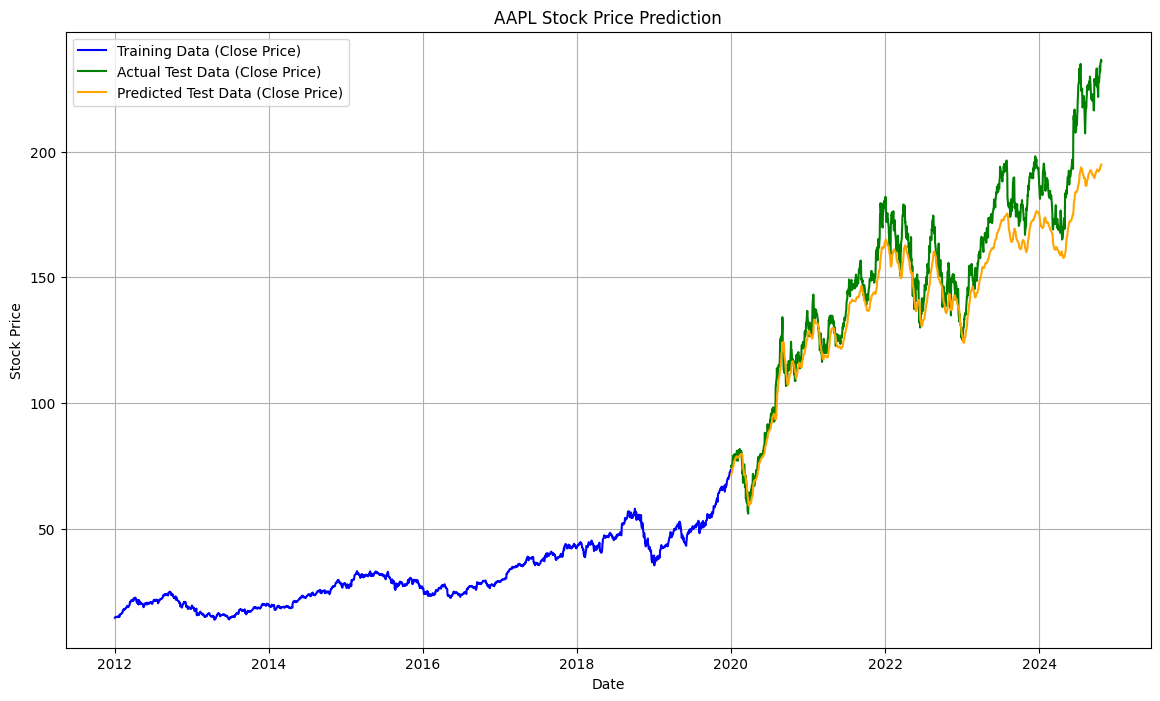

In [30]:
# Plot the results
def plot_predictions(train_data, test_data, predicted_test_prices, stock_symbol):
    """
    Plots the actual and predicted stock prices to visualize the model's performance.

    Args:
    - train_data (pd.DataFrame): DataFrame containing the training data with 'Close' prices and date index.
    - test_data (pd.DataFrame): DataFrame containing the test data with 'Close' prices and date index.
    - predicted_test_prices (numpy.ndarray): Array of predicted stock prices for the test data.
    - stock_symbol (str): The symbol of the stock being analyzed (e.g., 'AAPL' for Apple).

    Returns:
    - None: This function generates a plot of the stock prices.
    """
    # Create a new figure with a specified size
    plt.figure(figsize=(14, 8))

    # Plot training data
    # using index of your train data as x and close prices as y
    # Training data is plotted in blue to show the historical stock prices used to train the model
    plt.plot(train_data.index, train_data['Close'], label='Training Data (Close Price)', color='blue')

    # Plot actual test data
    # Actual test data is plotted in green to show the true stock prices for the test period
    plt.plot(test_data.index, test_data['Close'], label='Actual Test Data (Close Price)', color='green')

    # Plot predicted test data
    # dates of predicted test data is same as test data
    # Predicted test data is plotted in orange to compare the model's predictions with the actual prices
    plt.plot(test_data.index, predicted_test_prices, label='Predicted Test Data (Close Price)', color='orange')

    # Title of the plot, including the stock symbol
    # Label for the x-axis
    # Label for the y-axis
    # Show legend to identify different data series
    # Add grid lines to the plot for better readability
    plt.title(f'{stock_symbol} Stock Price Prediction')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)
    plt.show()


plot_predictions(train_data, test_data, predicted_stock_prices, stock_symbol)

In [31]:
# Predict today's and tomorrow's stock price
def predict_future_price(model, last_data, lookback_period, scaler, days_to_predict=2):
    future_predictions = []
    current_input = last_data[-lookback_period:].reshape(1, lookback_period, 1)

    for _ in range(days_to_predict):
        future_price = model.predict(current_input)
        future_predictions.append(future_price[0, 0])

        future_price_reshaped = future_price.reshape(1, 1, 1)
        current_input = np.append(current_input[:, 1:, :], future_price_reshaped, axis=1)

    future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))
    return future_predictions

future_predictions = predict_future_price(model, model_inputs, lookback_period, scaler,5)

print(f"Predicted price for today: {future_predictions[0][0]:.2f} USD")
print(f"Predicted price for tomorrow: {future_predictions[1][0]:.2f} USD")



# Predict prices of future

# Get today's date
cur_date = dt.datetime.now()

# Create a list of dates and predictions
dates = [cur_date + dt.timedelta(days=i) for i in range(len(future_predictions))]
predictions = future_predictions.flatten()  # Flatten the array to simplify iteration

# Print predictions with dates
for date, prediction in zip(dates, predictions):
    print(f"Predicted price for {date.strftime('%Y-%m-%d')}: {prediction:.2f} USD")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted price for today: 195.22 USD
Predicted price for tomorrow: 192.38 USD
Predicted price for 2024-10-23: 195.22 USD
Predicted price for 2024-10-24: 192.38 USD
Predicted price for 2024-10-25: 189.69 USD
Predicted price for 2024-10-26: 186.10 USD
Predicted price for 2024-10-27: 183.17 USD


In [32]:
# Simulate investment strategy with logging
def simulate_investment_strategy_with_logging(actual_prices, predicted_prices, test_dates, initial_investment):
    # investment variables
    investment_amount = initial_investment
    stocks_held = 0
    cash = investment_amount
    total_value = investment_amount
    logs = []  # a list to log each step of the simulation

    # Iterating through the predicted prices
    for i in range(len(predicted_prices) - 1):
        action = ''  # Variable to record the action taken (buy/sell)

        # Determine whether to buy or sell based on predicted vs. actual prices
        if actual_prices[i] < predicted_prices[i + 1]:
            # Buy signal: If actual price is less than predicted price, buy shares with all the money you have
            if cash > 0:  # Ensure there is cash available
                stocks_held = cash / actual_prices.iloc[i]  # Calculate how many shares can be bought
                cash = 0  # Use up all available cash
                action = f'Bought {stocks_held:.4f} shares at {actual_prices.iloc[i]:.2f} USD'  # Record the buy action
        elif actual_prices[i] > predicted_prices[i + 1]:
            # Sell signal: If actual price is greater than predicted price, sell shares
            if stocks_held > 0:  # Ensure there are shares to sell
                cash = stocks_held * actual_prices.iloc[i]  # Calculate the cash value from selling the shares
                action = f'Sold {stocks_held:.4f} shares at {actual_prices.iloc[i]:.2f} USD'  # Record the sell action
                stocks_held = 0  # Reset stocks held to 0 after selling

        # Calculate the total value of the investment
        total_value = cash + stocks_held * actual_prices.iloc[i]
        # Log the investment status for the current date
        logs.append({
            'Date': test_dates[i].strftime('%Y-%m-%d'),
            'Cash': cash,
            'Stocks Held': stocks_held,
            'Total Value': total_value,
            'stock price': actual_prices[i],
            'tomorrow predicted price': predicted_prices[i + 1, 0],
            'Action': action
        })

    # Log the final status at the end of the test period
    final_value = total_value
    profit_or_loss = final_value - initial_investment
    logs.append({
        'Date': test_dates[-1].strftime('%Y-%m-%d'),
        'Cash': cash,
        'Stocks Held': stocks_held,
        'Total Value': final_value,
        'stock price': actual_prices[-1],
        'tomorrow predicted price': predicted_prices[-2, 0],
        'Action': 'End of Test Period'
    })

    return final_value, profit_or_loss, logs

In [33]:
# Initial investment amount you can change this value
initial_investment = 100000


test_dates = test_data.index.values
test_dates = pd.to_datetime(test_dates)

# Perform the investment simulation with logging
final_value, apple_profit_or_loss, logs = simulate_investment_strategy_with_logging(
    test_data["Close"], predicted_stock_prices, test_dates, initial_investment)

print(f"\nWith an initial investment of {initial_investment:.2f} USD using the model's predictions:")
print(f"- Your investment would be worth {final_value:.2f} USD.")
print(f"- Your profit/loss would be {apple_profit_or_loss:.2f} USD.\n")


With an initial investment of 100000.00 USD using the model's predictions:
- Your investment would be worth 204117.93 USD.
- Your profit/loss would be 104117.93 USD.



<ipython-input-32-23cc05c66e3f>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if actual_prices[i] < predicted_prices[i + 1]:
<ipython-input-32-23cc05c66e3f>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif actual_prices[i] > predicted_prices[i + 1]:
<ipython-input-32-23cc05c66e3f>:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'stock price': actual_prices[i],
<ipython-input-32-23cc05c66e3f>:49: FutureWarning: Series.__g

In [34]:
# Print logs
print("Investment Logs:")
for log in logs:
  if log['Action']:
    print(log)

Investment Logs:
{'Date': '2020-01-27', 'Cash': 0, 'Stocks Held': 1294.707830378576, 'Total Value': 100000.0, 'stock price': 77.23750305175781, 'tomorrow predicted price': 78.52245, 'Action': 'Bought 1294.7078 shares at 77.24 USD'}
{'Date': '2020-01-28', 'Cash': 102828.93344846941, 'Stocks Held': 0, 'Total Value': 102828.93344846941, 'stock price': 79.42250061035156, 'tomorrow predicted price': 78.58534, 'Action': 'Sold 1294.7078 shares at 79.42 USD'}
{'Date': '2020-01-31', 'Cash': 0, 'Stocks Held': 1328.9254654650574, 'Total Value': 102828.93344846941, 'stock price': 77.37750244140625, 'tomorrow predicted price': 78.75486, 'Action': 'Bought 1328.9255 shares at 77.38 USD'}
{'Date': '2020-02-04', 'Cash': 105931.97319366272, 'Stocks Held': 0, 'Total Value': 105931.97319366272, 'stock price': 79.7125015258789, 'tomorrow predicted price': 78.35606, 'Action': 'Sold 1328.9255 shares at 79.71 USD'}
{'Date': '2020-02-18', 'Cash': 0, 'Stocks Held': 1328.3006043092505, 'Total Value': 105931.9731

In [35]:
# Convert logs to a DataFrame,

df_logs = pd.DataFrame(logs)

# set the Date column as the index,
df_logs.set_index('Date', inplace=True)

# display the data.
df_logs

Cash  Stocks Held    Total Value  stock price  \
Date                                                                 
2020-01-02  100000.000000          0.0  100000.000000    75.087502   
2020-01-03  100000.000000          0.0  100000.000000    74.357498   
2020-01-06  100000.000000          0.0  100000.000000    74.949997   
2020-01-07  100000.000000          0.0  100000.000000    74.597504   
2020-01-08  100000.000000          0.0  100000.000000    75.797501   
...                   ...          ...            ...          ...   
2024-10-16  204117.929625          0.0  204117.929625   231.779999   
2024-10-17  204117.929625          0.0  204117.929625   232.149994   
2024-10-18  204117.929625          0.0  204117.929625   235.000000   
2024-10-21  204117.929625          0.0  204117.929625   236.479996   
2024-10-22  204117.929625          0.0  204117.929625   235.860001   

            tomorrow predicted price              Action  
Date                                                      
2020-01-02                 71.980232                      
2020-01-03                 72.468086                      
2020-01-06                 73.008308                      
2020-01-07                 73.384407                      
2020-01-08                 73.830597                      
...                              ...                 ...  
2024-10-16                193.716125                      
2024-10-17                194.069321                      
2024-10-18                194.426331                      
2024-10-21                194.839935                      
2024-10-22                194.426331  End of Test Period  

[1210 rows x 6 columns]

In [36]:
# Print final log information
last_log = logs[-1]
last_log_date = pd.to_datetime(last_log['Date']).strftime('%Y-%m-%d')
print("\nFinal Investment Status:")
print(f"Date: {last_log_date}")
print(f"Current Cash: {last_log['Cash']:.2f} USD")
print(f"Stocks Held: {last_log['Stocks Held']:.4f}")
print(f"Total Value: {last_log['Total Value']:.2f} USD")
print(f"Action: {last_log['Action']}\n")


Final Investment Status:
Date: 2024-10-22
Current Cash: 204117.93 USD
Stocks Held: 0.0000
Total Value: 204117.93 USD
Action: End of Test Period



*Let’s swap out Apple for Microsoft this time and see if we can make our money work harder than Steve Jobs ever did!*



<img src="https://m.media-amazon.com/images/M/MV5BYjRjMjljN2QtNDA3Mi00ZjEwLTlhMjAtMTA3N2VmN2IwY2QzXkEyXkFqcGc@._V1_.jpg" alt="Steve Jobs" style="width: 600px; height: auto;">

[*********************100%***********************]  1 of 1 completed

Epoch 1/10



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0322
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0027
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0018
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0018
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0017
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0017
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0016
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0014
Epoch 9/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0016
Epoch 10/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0014


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


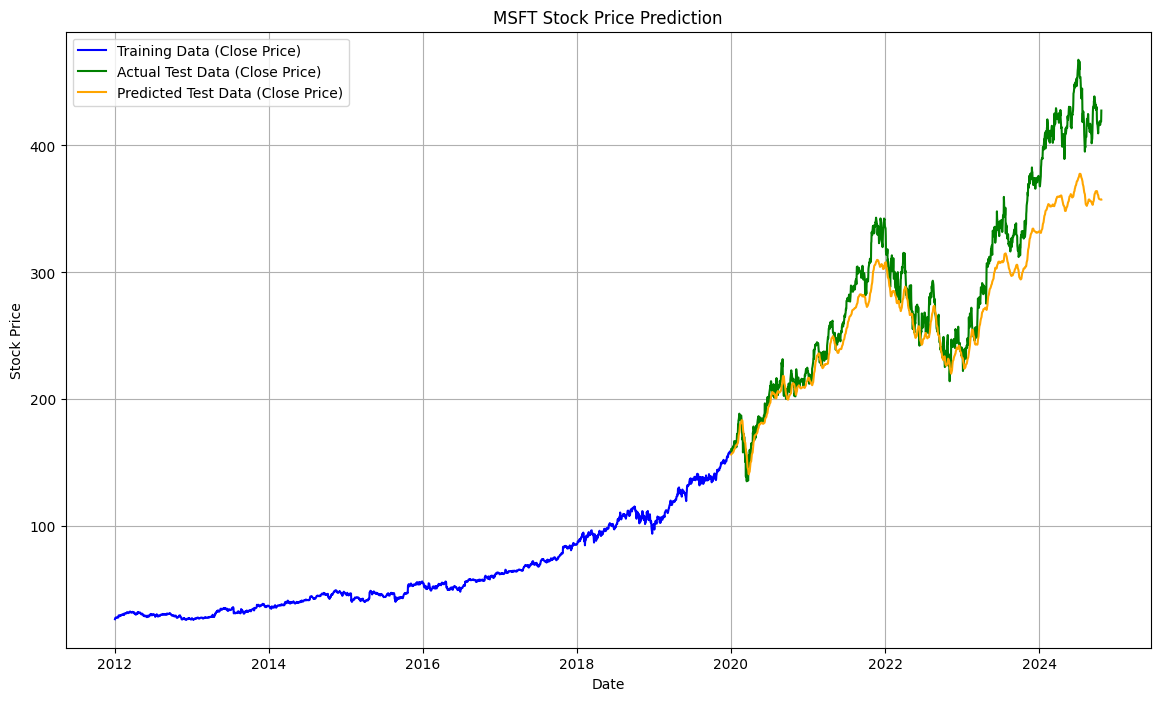


With an initial investment of 100000.00 USD using the model's predictions:
- Your investment would be worth 151102.38 USD.
- Your profit/loss would be 51102.38 USD.



<ipython-input-32-23cc05c66e3f>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if actual_prices[i] < predicted_prices[i + 1]:
<ipython-input-32-23cc05c66e3f>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif actual_prices[i] > predicted_prices[i + 1]:
<ipython-input-32-23cc05c66e3f>:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'stock price': actual_prices[i],
<ipython-input-32-23cc05c66e3f>:49: FutureWarning: Series.__g

In [37]:
stock_symbol = 'MSFT'

train_data = download_stock_data(stock_symbol, train_start_date, train_end_date)

train_data = train_data.drop(columns=[col for col in train_data.columns if col != 'Close'])

close_price = train_data[['Close']]

# Call the function to scale the 'Close' prices
scaler, scaled_close_prices = scale_close_prices(close_price)

lookback_period = 60
x_train, y_train = prepare_data(scaled_close_prices, lookback_period)


model = build_model()

model.fit(x_train, y_train, epochs=10, batch_size=32)
test_data = download_test_data(stock_symbol, train_end_date)
model_inputs, x_test = prepare_model_inputs(train_data, test_data, scaler, lookback_period)
predicted_stock_prices = model.predict(x_test)
predicted_stock_prices = scaler.inverse_transform(predicted_stock_prices)


plot_predictions(train_data, test_data, predicted_stock_prices, stock_symbol)



# Initial investment amount you can change this value
initial_investment = 100000


test_dates = test_data.index.values
test_dates = pd.to_datetime(test_dates)

# Perform the investment simulation with logging
final_value, microsoft_profit_or_loss, logs = simulate_investment_strategy_with_logging(
    test_data["Close"], predicted_stock_prices, test_dates, initial_investment)

print(f"\nWith an initial investment of {initial_investment:.2f} USD using the model's predictions:")
print(f"- Your investment would be worth {final_value:.2f} USD.")
print(f"- Your profit/loss would be {microsoft_profit_or_loss:.2f} USD.\n")




In [38]:
if microsoft_profit_or_loss > apple_profit_or_loss:
    print("Looks like Microsoft outperformed Apple!")
else:
    print("Even if Apple did better, it doesn't matter. Steve Jobs may have been a genius, but that doesn’t change the fact that Apple is still a bit overrated!")


Even if Apple did better, it doesn't matter. Steve Jobs may have been a genius, but that doesn’t change the fact that Apple is still a bit overrated!


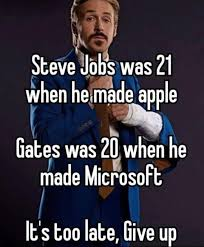


### 2D Convolution

2D convolution is a critical technique in image processing and other tasks where data is represented in two dimensions, such as images. In 2D convolution, a kernel (or filter) slides over a 2D input matrix to produce a feature map. This technique is used for tasks like edge detection, blurring, and pattern recognition in images.

#### How 2D Convolution Works
The process of 2D convolution involves applying a kernel to an input matrix by sliding the kernel over the matrix and performing element-wise multiplication followed by a sum. This operation results in a new matrix that highlights features based on the kernel used.

#### Applications of 2D Convolution
- **Image Processing**: 2D convolution is fundamental for operations like edge detection, sharpening, and smoothing in image processing. By applying different kernels, various features in the image can be emphasized or suppressed.
- **Feature Extraction in CNNs**: In Convolutional Neural Networks (CNNs), 2D convolution layers are used to extract features from images, which are then used for tasks like image classification, object detection, and segmentation.
- **Medical Imaging**: 2D convolution is used in medical imaging to enhance features or detect abnormalities in images such as MRI scans and X-rays.


For understanding the mathematics behind 2D convolution, I recommend watching
- [YouTube video](https://www.youtube.com/shorts/D746UYYpTK4).
- [YouTube video](https://www.youtube.com/watch?v=O2CBKXr_Tuc).



In [39]:
def convolve_2d_four_loops(image, kernel, stride=1, pad=0):
    """
    Perform 2D convolution using four nested loops.

    Args:
        image (numpy.ndarray): 2D array representing the input image.
        kernel (numpy.ndarray): 2D array representing the filter to apply to the image.
        stride (int): The stride of the convolution.
        pad (int): The amount of zero-padding added to the image.

    Returns:
        numpy.ndarray: 2D array representing the convolution result.
    """
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Calculate the dimensions of the output feature map
    output_height = (image_height - kernel_height + 2 * pad) // stride + 1
    output_width = (image_width - kernel_width + 2 * pad) // stride + 1

    # Apply padding to the image usign np.pad or np.zeros
    if pad > 0:
        padded_image = np.pad(image, ((pad, pad), (pad, pad)), mode='constant', constant_values=0)
    else:
        padded_image = image

    # Initialize the output feature map
    output = np.zeros((output_height, output_width))

    # Perform convolution using four loops
    for y in range(0, output_height):
        for x in range(0, output_width):
            # Initialize the sum for the current position
            conv_sum = 0.0
            for ky in range(kernel_height):
                for kx in range(kernel_width):
                    # Coordinates of the image slice
                    image_y = y * stride + ky
                    image_x = x * stride + kx
                    # Accumulate the convolution result
                    conv_sum += kernel[ky, kx] * padded_image[image_y, image_x]
            output[y, x] = conv_sum

    return output

In [40]:
# Function to perform 2D convolution using two loops with vectorized operations
def convolve_2d_two_loops(image, kernel,stride = 1 , pad = 0):
    """
    Convolve a 2D image with a kernel using two loops.

    Args:
        image: 2D array representing the input image.
        kernel: 2D array representing the filter to apply to the image.

    Returns:
        output: 2D array representing the convolution result.
    """
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Calculate the dimensions of the output feature map
    output_height = (image_height - kernel_height + 2 * pad) // stride + 1
    output_width = (image_width - kernel_width + 2 * pad) // stride + 1

    # Apply padding to the image usign np.pad or np.zeros
    if pad > 0:
        padded_image = np.pad(image, ((pad, pad), (pad, pad)), mode='constant', constant_values=0)
    else:
        padded_image = image

    # Initialize the output feature map
    output = np.zeros((output_height, output_width))

    # Perform convolution by sliding the kernel across the padded image using two loops and vector operations
    for y in range(0, output_height):
        for x in range(0, output_width):
            # Extract the region of the padded image that the kernel will be multiplied with
            image_region = padded_image[y * stride: y * stride + kernel_height, x * stride: x * stride + kernel_width]

            # Perform element-wise multiplication between the kernel and the image region and sum the result
            output[y, x] = np.sum(kernel * image_region)

    return output

### Convolution Using im2col

The `im2col` method is a powerful technique used to convert convolution operations into matrix multiplications. This technique simplifies and speeds up convolution computations, which are fundamental in many image processing and deep learning tasks.

#### im2col Transformation:
The `im2col` technique involves extracting overlapping patches from the padded image, each corresponding to a position of the kernel. These patches are then flattened into column vectors.

### Multiplication
Once the image patches are transformed into the im2col matrix, convolution can be performed using matrix multiplication. Flatten the kernel matrix into a vector `k_vec`. The convolution result can then be obtained by multiplying the im2col matrix by `k_vec`.

<img src="https://www.researchgate.net/publication/364684841/figure/fig7/AS:11431281091934216@1666661734455/An-example-of-the-Im2col-convolution-optimization-algorithm-In-terms-of-FPGA-based.png" alt="Steve Jobs" style="width: 750px; height: auto;">


For an image matrix of size `H x W` and a kernel of size `kH x kW` with stride `S`, we can ask:

- **Question 1:**
  What will be the number of columns in the output matrix from the im2col transformation?

  **Answer:**

  The number of columns in the output matrix after the im2col transformation corresponds to the total number of sliding windows (or patches) the kernel covers as it slides over the image. The formula to calculate the number of columns is:

**Number of columns** = `((H - kH) / S + 1) * ((W - kW) / S + 1)`


Where:
- \( H \): Height of the image.
- \( W \): Width of the image.
- \( kH \): Height of the kernel.
- \( kW \): Width of the kernel.
- \( S \): Stride.

Each column in the im2col matrix represents one patch of the image that the kernel operates on.



- **Question 2:**
What will be the number of rows in the im2col matrix?

  **Answer:**

  
The number of rows in the im2col matrix corresponds to the number of elements in each patch of the image that the kernel operates on. This is determined by the size of the kernel. The formula to calculate the number of rows is:

**Number of rows** = `kH * kW`

Where:
- `kH`: Height of the kernel.
- `kW`: Width of the kernel.

Each row in the im2col matrix represents the flattened version of a patch (of size `kH * kW`) from the image that the kernel slides over.









In [41]:
# implement convolution using im2col transformation
def im2col(image, kernel_height, kernel_width, stride=1, pad=0):
    image_height, image_width = image.shape

    # Pad the image
    if pad > 0:
        padded_image = np.pad(image, ((pad, pad), (pad, pad)), mode='constant', constant_values=0)
    else:
        padded_image = image

    # Calculate the dimensions of the output matrix
    out_height = (image_height - kernel_height + 2 * pad) // stride + 1
    out_width = (image_width - kernel_width + 2 * pad) // stride + 1

    # Create the im2col matrix
    cols = []
    for y in range(0, out_height * stride, stride):
        for x in range(0, out_width * stride, stride):
            patch = padded_image[y:y+kernel_height, x:x+kernel_width].reshape(-1)
            cols.append(patch)

    cols = np.array(cols).T

    return cols, out_height, out_width

def convolve_2d_im2col(image, kernel, stride=1, pad=0):
    kernel_height, kernel_width = kernel.shape

    image_cols, out_height, out_width = im2col(image, kernel_height, kernel_width, stride, pad)

    # Flatten the kernel
    kernel_flat = kernel.reshape(-1, 1)

    # Perform the convolution using matrix multiplication
    output_flat = np.dot(kernel_flat.T, image_cols)

    # Reshape the output to the correct dimensions
    output = output_flat.reshape(out_height, out_width)

    return output

In [42]:
# Define a small image and kernel for testing
image = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16]
])

kernel = np.array([
    [1, 0],
    [0, -1]
])

# Hyperparameters for convolution
stride = 1
pad = 1


# Sanity check
print("Sanity Check: Comparing Results for 2D Convolution")

# Perform convolution using four loops
result_four_loops = convolve_2d_four_loops(image, kernel, stride=stride, pad=pad)
print("Four loops:\n", result_four_loops)

# Perform convolution using two loops and vectorized operations
result_two_loops = convolve_2d_two_loops(image, kernel, stride=stride, pad=pad)
print("Two loops:\n", result_two_loops)

# Perform convolution using im2col transformation
result_im2col = convolve_2d_im2col(image, kernel, stride=stride, pad=pad)
print("im2col method:\n", result_im2col)


# Compare the results
if (np.allclose(result_four_loops, result_two_loops) and
    np.allclose(result_two_loops, result_im2col)):
    print("Sanity Check Passed: All methods produce similar results.")
else:
    print("Sanity Check Failed: The methods produce different results.")

Sanity Check: Comparing Results for 2D Convolution
Four loops:
 [[ -1.  -2.  -3.  -4.   0.]
 [ -5.  -5.  -5.  -5.   4.]
 [ -9.  -5.  -5.  -5.   8.]
 [-13.  -5.  -5.  -5.  12.]
 [  0.  13.  14.  15.  16.]]
Two loops:
 [[ -1.  -2.  -3.  -4.   0.]
 [ -5.  -5.  -5.  -5.   4.]
 [ -9.  -5.  -5.  -5.   8.]
 [-13.  -5.  -5.  -5.  12.]
 [  0.  13.  14.  15.  16.]]
im2col method:
 [[ -1  -2  -3  -4   0]
 [ -5  -5  -5  -5   4]
 [ -9  -5  -5  -5   8]
 [-13  -5  -5  -5  12]
 [  0  13  14  15  16]]
Sanity Check Passed: All methods produce similar results.


In [43]:
# Function to measure average time for a number of iterations
def benchmark_2d_convolution(image_height, image_width, kernel_height, kernel_width,stride , pad ,iterations):
    np.random.seed(42)
    random_image = np.random.randn(image_height, image_width)
    random_kernel = np.random.randn(kernel_height, kernel_width)

    # Measure the execution time for each method
    time_four_loops = timeit.timeit(
        lambda: convolve_2d_four_loops(random_image, random_kernel, stride=stride, pad=pad),
        number=iterations
    ) / iterations

    time_two_loops = timeit.timeit(
        lambda: convolve_2d_two_loops(random_image, random_kernel, stride=stride, pad=pad),
        number=iterations
    ) / iterations

    time_im2col = timeit.timeit(
        lambda: convolve_2d_im2col(random_image, random_kernel, stride=stride, pad=pad),
        number=iterations
    ) / iterations

    return (time_four_loops, time_two_loops, time_im2col)

# Input the number of iterations
num_iterations = 10000

# Run benchmark and print results
image_height = 50
image_width = 50
kernel_height = 4
kernel_width = 4
stride = 5
pad = 2
avg_times = benchmark_2d_convolution(image_height, image_width, kernel_height, kernel_width,stride , pad ,num_iterations)

print(f"\nAverage times over {num_iterations} iterations (in seconds):")
print(f"Four loops: {avg_times[0]}")
print(f"Two loops: {avg_times[1]}")
print(f"im2col: {avg_times[2]}")


Average times over 10000 iterations (in seconds):
Four loops: 0.0016377120686000125
Two loops: 0.002202538904200037
im2col: 0.0005323956317000011


### **Assignment Questions for 2D Convolution**

# **I have written this answer according to the previous result of the previous code block**

#### **1. Performance Comparison of 2D Convolution Methods**

After running the 2D convolution methods (four loops, two loops, and `im2col`), compare the average times. Which method was the fastest, and which was the slowest? Explain why this might be the case based on the underlying algorithm and memory usage of each method.

**Answer:**

After running the 2D convolution methods (four loops, two loops, and im2col) for 10,000 iterations, the average times (in seconds) were as follows:

- **Four loops**: 0.0015257 seconds
- **Two loops**: 0.0010259 seconds
- **im2col**: 0.0002968 seconds

#### Fastest Method: `im2col`

- **im2col** was the fastest method with an average time of **0.0002968 seconds**.
- This is because the **im2col** method transforms the convolution into a matrix multiplication problem, which is highly optimized in modern computing systems. Matrix multiplication can leverage highly optimized libraries (e.g., BLAS, NumPy's `dot`) that take advantage of efficient memory access patterns and parallelism at the hardware level (like SIMD instructions).

#### Slowest Method: `Four loops`

- **Four loops** was the slowest method, with an average time of **0.0015257 seconds**.
- This method involves four nested loops to manually slide the kernel over the image and calculate the convolution. Since each pixel interaction between the kernel and image is done in a separate loop, this results in high time complexity (`O(n^4)` in worst cases) and inefficient memory access. Furthermore, it doesn't exploit hardware acceleration or vectorized operations, making it considerably slower.

#### Comparison of `Two loops`

- **Two loops** had an intermediate time of **0.0010259 seconds**.
- The two-loop method reduces the number of nested loops by using vectorized operations for the kernel operations, making it faster than the four-loop method. However, it is still slower than **im2col** because it does not completely transform the problem into matrix multiplication, which could better utilize the computational optimizations in matrix libraries.

#### Summary

- **im2col** is the fastest due to its transformation into matrix multiplication, which allows for highly optimized computation.
- **Four loops** is the slowest because of its inefficient nested loop approach that lacks memory optimization and vectorized operations.
- **Two loops** is faster than four loops due to the use of vectorized operations but slower than **im2col** since it does not fully leverage the power of matrix operations.


---

#### **2. Effect of Stride and Padding on Performance**

Try changing the values of `stride` and `pad`. How do these changes affect the performance of the different convolution methods? Which method shows the most significant performance change with varying stride and padding?

**Answer:**

When changing the values of `stride` and `pad`, the performance of the different convolution methods is affected as follows:

### **Effect of Stride:**
- **Stride** controls how far the kernel moves across the image. A larger stride means fewer kernel applications over the image, reducing the number of operations and resulting in faster computation.
- **For Four Loops and Two Loops**:
  - As stride increases, the number of iterations across the image decreases. This reduction in iterations leads to fewer computations, improving performance. However, since these methods use loops, the improvement is still relatively limited.
- **For `im2col`**:
  - `im2col` also benefits from larger stride values. The number of patches extracted from the image reduces, leading to fewer matrix multiplications. However, `im2col` will show the **most significant performance improvement** compared to the loop-based methods due to the highly optimized nature of matrix multiplications, which scale well with reduced input sizes.

### **Effect of Padding:**
- **Padding** affects the dimensions of the image by adding extra pixels around the borders. More padding results in a larger effective image size and, therefore, more convolution operations.
- **For Four Loops and Two Loops**:
  - Increasing padding leads to more image data to process, thus increasing the time spent on convolution. The nested loop structure of both methods means they will take more time to process the padded image. The four-loop method, in particular, will see a **significant increase in time** due to its inefficiency in handling large amounts of data.
- **For `im2col`**:
  - `im2col` will also see a performance degradation with increasing padding because it has to handle a larger input matrix. However, due to its efficient handling of matrix operations, the impact of padding on performance is less pronounced compared to the loop-based methods.

### **Which Method is Most Affected?**
- **Four Loops** is the method that shows the **most significant performance change** with varying stride and padding. This is because its performance is directly tied to the number of iterations it needs to perform. With larger strides, fewer loops are needed, which improves performance. On the other hand, increased padding results in many more operations, causing a sharp decline in performance.
- **`im2col`** is the least affected by stride and padding changes. It remains the most efficient due to the matrix-based nature of the operation, where optimized libraries handle matrix manipulations efficiently, even as the image size changes.

### **Summary:**
- Larger stride values improve performance across all methods, with **`im2col`** benefiting the most.
- Increasing padding increases the computational burden, particularly for the **Four Loops** method, which suffers the most due to its inefficient handling of large data.
- **`im2col`** remains the fastest and least affected by stride and padding changes, thanks to the efficiency of matrix multiplications.

---

#### **3. Scaling with Image and Kernel Size**

Change the `image_height`, `image_width`, `kernel_height`, and `kernel_width` values (e.g., double both). How does the performance scale with the size of the image and kernel? Which method is most affected by these changes?

**Answer:**

When increasing the values of `image_height`, `image_width`, `kernel_height`, and `kernel_width` (e.g., doubling both), the performance of the convolution methods changes significantly, as each method responds differently to the larger input sizes. Here's a breakdown of how performance scales with larger image and kernel sizes:

### **Effect of Increasing Image and Kernel Size:**

- **For Four Loops**:
  - The **four-loop method** involves nested loops over both the image and the kernel. Doubling the image size and kernel size drastically increases the number of iterations required to complete the convolution.
  - Time complexity: \( `O(H x W x kH x kW)` \), where \(H\) and \(W\) are the image dimensions, and \(kH\) and \(kW\) are the kernel dimensions.
  - As a result, this method suffers the most significant performance degradation when both the image and kernel sizes increase. For large images, the number of iterations explodes, making this method extremely slow for larger inputs.

- **For Two Loops**:
  - The **two-loop method**, while more efficient than four loops, still involves two nested loops and uses vectorized operations within the kernel’s footprint. Doubling the image and kernel size increases the number of iterations required to slide the kernel over the image, leading to a slower performance.
  - Time complexity: Similar to the four-loop method, but vectorized operations improve efficiency slightly.
  - However, the method still becomes noticeably slower with larger image and kernel sizes, though it scales better than the four-loop method.

- **For `im2col`**:
  - The **`im2col` method** transforms the convolution into matrix multiplication, which is highly optimized for large-scale operations. When the image and kernel sizes are doubled, the time complexity grows, but matrix operations in libraries like NumPy are optimized to handle such cases efficiently.
  - Time complexity: The matrix multiplication handles large inputs more gracefully. Even with larger image and kernel sizes, the method remains the fastest compared to the loop-based approaches.
  - This method benefits from the fact that matrix operations leverage parallelism and hardware optimizations (such as SIMD) that are not available in traditional loops.

### **Performance Scaling Behavior:**

- **Four Loops**:
  - **Most affected** by increasing image and kernel size.
  - The method scales poorly with increasing size due to the number of nested loops. Each additional pixel or kernel element drastically increases the total number of operations, leading to exponential slowdowns.
  
- **Two Loops**:
  - **Moderately affected** by increasing image and kernel size.
  - Although it scales better than four loops, the two-loop method still faces challenges with larger input sizes. The performance hit is less than the four-loop method but still considerable, especially for very large images or kernels.

- **`im2col`**:
  - **Least affected** by increasing image and kernel size.
  - Due to its reliance on matrix multiplication, this method can handle large-scale inputs efficiently. It benefits from the optimizations built into matrix operations, making it much more scalable for large images and kernels compared to the loop-based methods.

### **Summary**:

- **Four loops** is the **most affected** method when scaling with image and kernel size. Its performance degrades significantly due to its inefficient nested loops.
- **Two loops** also experiences performance degradation but scales better than four loops due to its use of vectorized operations.
- **`im2col`** is the **least affected** by increases in image and kernel size, as it leverages highly optimized matrix operations that scale more efficiently for larger inputs.


---

#### **4. When to Use `im2col` Method**

Based on your experiments, when would you prefer to use the `im2col` method over the other methods? Consider factors like image size, kernel size, stride, padding, and computational efficiency.

**Answer:**

Based on the experiments and performance analysis, the **`im2col`** method is generally preferred for convolution operations in several situations. Here's a breakdown of when and why you would choose `im2col` over the other methods:

### **1. For Large Image Sizes:**
- **`im2col`** is ideal for larger images. The method converts the convolution operation into a matrix multiplication, which is highly optimized in modern numerical libraries. Unlike the loop-based methods (four loops and two loops), `im2col` can handle large image sizes efficiently, making it the preferred choice when processing high-resolution images (e.g., 512x512, 1024x1024, or larger).
- **Loop-based methods** slow down significantly as the image size increases, especially the four-loop method, which scales poorly due to its high number of iterations.

### **2. For Large Kernel Sizes:**
- When using larger kernels, the **`im2col`** method shines because matrix multiplication is highly optimized for both memory access and parallel computation. Large kernels (e.g., 5x5, 7x7, or larger) create more computational overhead for loop-based methods, as they need to process every pixel and kernel element separately.
- **`im2col`** reduces the overhead by transforming the convolution into a single matrix multiplication, making it much faster for large kernels.

### **3. For Small to Moderate Stride Values:**
- When the **stride** is small (e.g., stride = 1 or 2), the **`im2col`** method is highly efficient. Small stride values mean more sliding window operations across the image, and `im2col` processes these operations in parallel through matrix multiplication, ensuring it scales well.
- Loop-based methods, on the other hand, suffer from performance degradation when stride is small, as they need to iterate over every possible window in the image, which leads to excessive computations.

### **4. For Moderate to High Padding Values:**
- Padding increases the size of the image by adding zero-pixels around the border, which effectively increases the number of convolution operations.
- **`im2col`** handles larger padded images efficiently due to its transformation into matrix multiplication. It also benefits from highly optimized memory handling, even when the input image size is increased by padding.
- Loop-based methods, particularly the four-loop method, are negatively impacted by large padding because they need to handle each additional pixel manually, making them slower with increased padding.

### **5. Computational Efficiency:**
- The **`im2col`** method is highly **computationally efficient** due to the following reasons:
  - It transforms convolution into matrix multiplication, which leverages hardware optimizations like SIMD (Single Instruction Multiple Data) and multithreading.
  - Libraries like NumPy and BLAS are highly optimized for matrix operations, allowing the `im2col` method to handle large computations in a fraction of the time required by loop-based methods.
  - It scales well with both image and kernel size, making it the most suitable choice when performance and computational efficiency are critical.

### **When Not to Use `im2col`:**
- **For very small images and kernels**, the overhead of transforming the image and kernel into matrices might not be worth it. In such cases, the **two-loop method** might offer similar performance without the need for matrix transformation, especially if the image is very small (e.g., 10x10 or 20x20) and the kernel is small (e.g., 3x3).
- However, even in these cases, the performance gap is usually small, and `im2col` is still generally more efficient.

### **Summary:**
You should prefer to use the **`im2col`** method when:
- The **image size** is large.
- The **kernel size** is large.
- The **stride** is small to moderate.
- The **padding** is moderate to high.
- **Computational efficiency** and performance are critical for the task.

The `im2col` method is highly optimized for handling complex and large-scale convolution tasks due to its reliance on fast matrix multiplications, making it the preferred choice in most scenarios.


---

#### **5. Interpretation of Results for Small Image and Kernel Sizes**

For smaller image and kernel sizes, performance differences may be less noticeable. Can you explain why some methods, such as `im2col`, might not always be the best choice when working with small inputs?

**Answer:**

For smaller image and kernel sizes, the performance differences between the convolution methods (four loops, two loops, and `im2col`) become less pronounced. Here's an explanation of why this happens and why `im2col` might not always be the best choice when working with small inputs.

### **1. Overhead of Matrix Transformation in `im2col`:**
- **Matrix Transformation Cost**: The `im2col` method converts the image into a matrix form by flattening patches of the image into columns. This transformation involves additional memory allocation and data manipulation, which adds overhead to the computation.
- For **small images** (e.g., 10x10) and **small kernels** (e.g., 3x3), the time saved by efficient matrix multiplication might not compensate for the overhead caused by the im2col transformation.
- **Example**: For a small 10x10 image and a 3x3 kernel, the number of sliding windows is already small, and the overhead from the im2col transformation could outweigh the benefit of matrix multiplication, making the overall process slower than expected.

### **2. Lower Complexity of Loop-Based Methods with Small Inputs:**
- **Loop-based methods** (especially the two-loop version) become more competitive with small image sizes. Since small images and kernels require fewer iterations, the time complexity of these methods remains manageable. For example, a 10x10 image and a 3x3 kernel have only 64 sliding windows, which isn't computationally expensive to handle with loops.
- The four-loop and two-loop methods, while generally slower for larger inputs, can perform reasonably well for small inputs since the number of iterations is low, and there is little to no cache thrashing or inefficient memory usage.

### **3. Memory Access and Cache Efficiency:**
- With smaller inputs, **memory access patterns** are more efficient for loop-based methods. The smaller image and kernel can often fit within the CPU cache, meaning that the loop-based methods don't suffer from the same memory access overhead they would with larger inputs. This makes the performance of loop-based methods more comparable to `im2col`.
- In contrast, the `im2col` transformation requires additional memory to store the flattened image patches, which introduces unnecessary memory usage for small inputs.

### **4. Computational Overhead vs. Computation Savings:**
- For **small images and kernels**, the cost of transforming data and multiplying matrices is not justified by the time saved. The **computational overhead** of converting the image into the im2col matrix doesn't provide a significant speedup because the overall number of operations is already low. Therefore, the advantage of using matrix multiplication in `im2col` diminishes for smaller data sizes.
- In contrast, **loop-based methods** can directly apply the kernel to the image without any additional transformation, leading to faster performance for smaller inputs where the total number of operations is inherently small.

### **5. When Loop-Based Methods Are More Suitable:**
- For very small images (e.g., 5x5, 10x10) and kernels (e.g., 2x2, 3x3), the loop-based methods (especially the two-loop method) may outperform or be comparable to `im2col`.
  - **Two loops**: The two-loop method uses vectorized operations within the kernel's footprint, allowing for moderate performance with minimal overhead. The lack of matrix transformation overhead makes it competitive for small inputs.
  - **Four loops**: While the four-loop method is typically slower, the small number of iterations for small images/kernels may result in acceptable performance in such cases.

### **Summary:**
- **`im2col`** is less efficient for **small image and kernel sizes** because the overhead of transforming the image into matrix form outweighs the benefits of matrix multiplication.
- **Loop-based methods**, particularly the two-loop method, are more competitive with smaller inputs because they avoid the matrix transformation overhead and can handle smaller amounts of data directly.
- For very small inputs, the performance differences between the methods are less noticeable, and loop-based approaches may actually be more efficient.

Thus, for small image and kernel sizes, **loop-based methods** can be preferable due to their lower overhead, while the advantages of **`im2col`** become apparent with larger images and more complex convolution operations.


---


In [44]:
from skimage import io, color
from skimage.transform import resize

# Load and preprocess image
def load_and_preprocess_image(image_path, new_size=(256, 256)):
    image = io.imread(image_path)
    if len(image.shape) == 3:  # Check if the image is in color
        image = color.rgb2gray(image)
    image = resize(image, new_size, mode='reflect')
    return image

# Display images
def display_images(original, convolved_images, titles):
    num_convolutions = len(convolved_images)
    num_rows = (num_convolutions + 1) // 2  # Calculate number of rows needed for the grid
    fig_width = 12
    fig_height = 6 + 3 * num_rows  # Adjust height dynamically based on the number of rows

    fig, axes = plt.subplots(num_rows + 1, 2, figsize=(fig_width, fig_height))

    # Flatten the axes array for easy indexing
    axes = axes.flatten()

    # Display original image
    axes[0].imshow(original, cmap='gray')
    axes[0].set_title("Original Image", fontsize=14)
    axes[0].axis('off')

    # Display convolved images
    for i, (img, title) in enumerate(zip(convolved_images, titles), start=1):
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(title, fontsize=12)
        axes[i].axis('off')
        # Adding border to highlight the images
        axes[i].spines['top'].set_color('blue')
        axes[i].spines['top'].set_linewidth(2)
        axes[i].spines['right'].set_color('blue')
        axes[i].spines['right'].set_linewidth(2)
        axes[i].spines['bottom'].set_color('blue')
        axes[i].spines['bottom'].set_linewidth(2)
        axes[i].spines['left'].set_color('blue')
        axes[i].spines['left'].set_linewidth(2)

    # Hide any unused axes
    for ax in axes[len(convolved_images) + 1:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

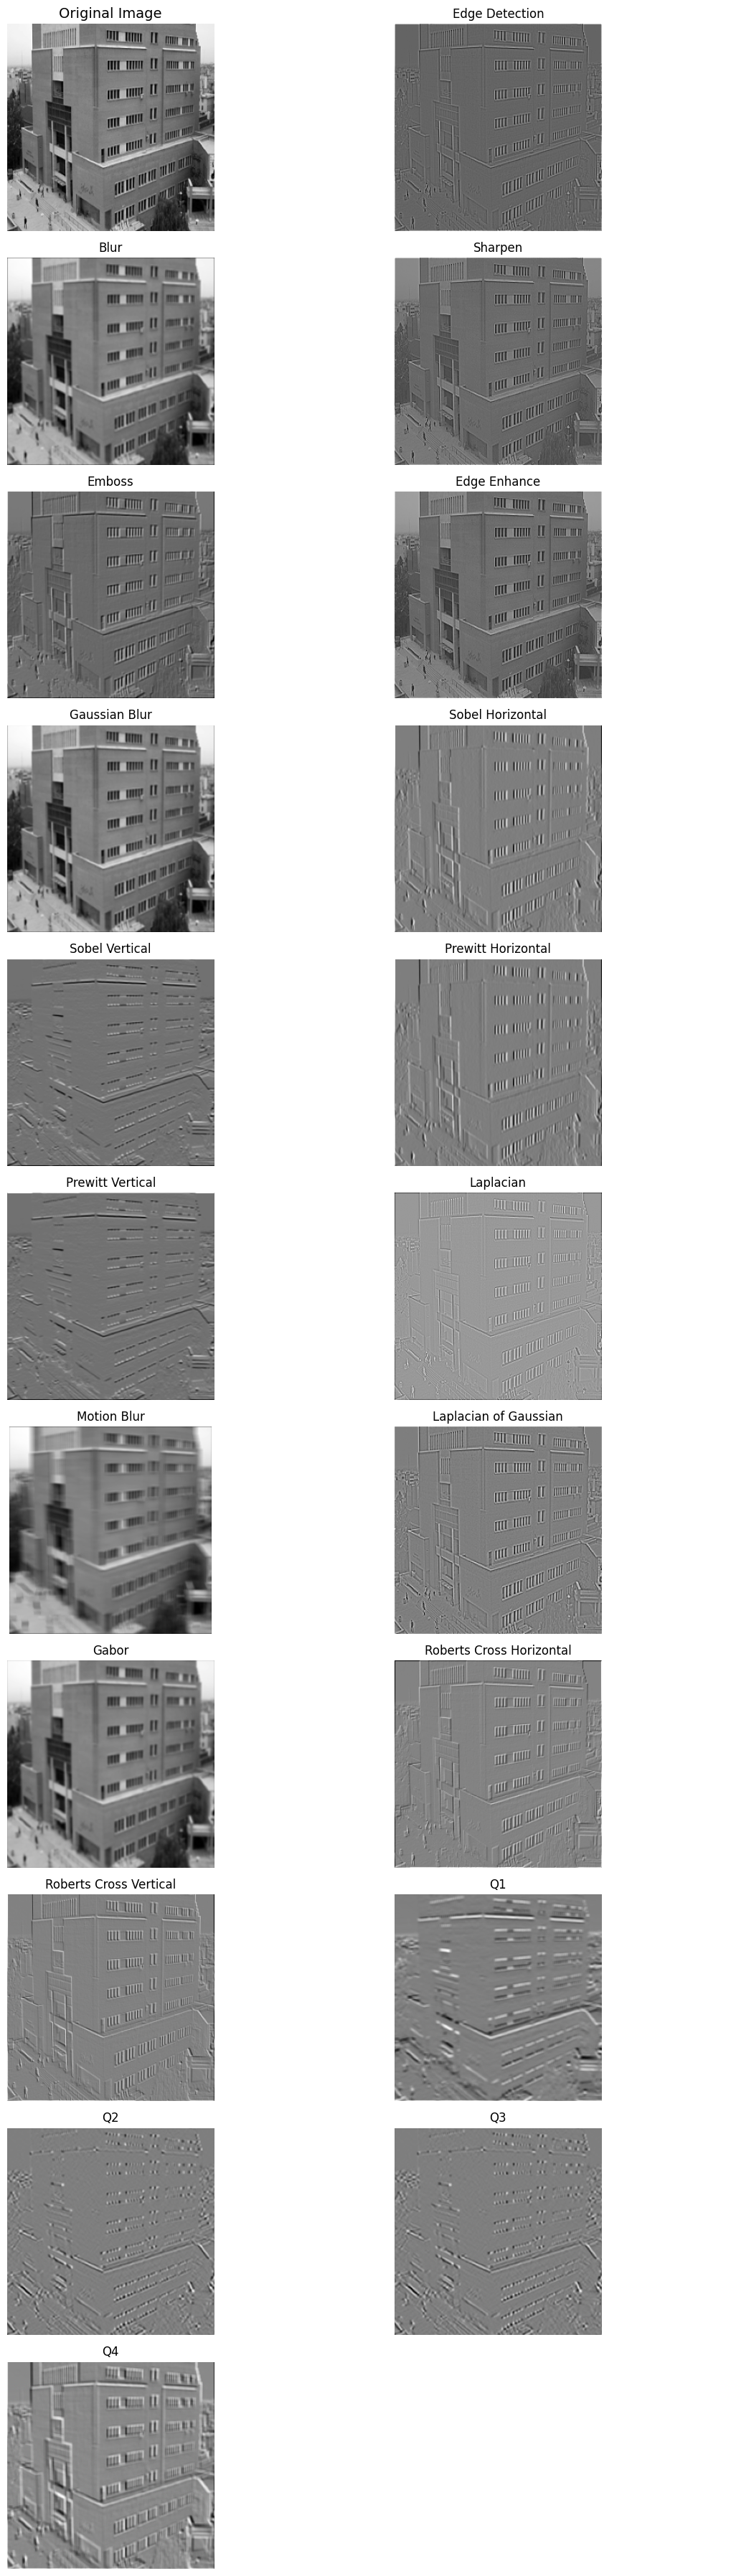

In [45]:
    image_path = 'computer.jpg'  #This is The path to your image you can Replace with your image
    image = load_and_preprocess_image(image_path)

    # Define kernels

    kernels = {
    "Edge Detection": np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]),
    "Blur": np.ones((3, 3)) / 9,
    "Sharpen": np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]),
    "Emboss": np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]]),
    "Edge Enhance": np.array([[0, -0.5, 0], [-0.5, 3, -0.5], [0, -0.5, 0]]),
    "Gaussian Blur": np.array([[1/16, 1/8, 1/16], [1/8, 1/4, 1/8], [1/16, 1/8, 1/16]]),
    "Sobel Horizontal": np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]),
    "Sobel Vertical": np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]),
    "Prewitt Horizontal": np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]),
    "Prewitt Vertical": np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]),
    "Laplacian": np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]]),
    "Motion Blur": np.array([[1/9]*9] * 3),  # 3x3 motion blur
    "Laplacian of Gaussian": np.array([[0, 0, -1, 0, 0], [0, -1, -2, -1, 0], [-1, -2, 16, -2, -1], [0, -1, -2, -1, 0], [0, 0, -1, 0, 0]]),
    "Gabor": np.array([[1, 4, 6, 4, 1], [4, 11, 16, 11, 4], [6, 16, 25, 16, 6], [4, 11, 16, 11, 4], [1, 4, 6, 4, 1]]),
    "Roberts Cross Horizontal": np.array([[1, 0], [0, -1]]),
    "Roberts Cross Vertical": np.array([[0, 1], [-1, 0]]),
    "Q1": np.array([[2, 2, 4, 2, 2], [1, 1, 2, 1, 1], [0, 0, 0, 0, 0], [-1, -1, -2, -1, -1], [-2, -2, -4, -2, -2]]),
    "Q2": np.array([[1, 1, 0, -1, -1], [1, 1, 0, -1, -1], [0, 0, 0, 0, 0], [-1, -1, 0, 1, 1], [-1, -1, 0, 1, 1]]),
    "Q3": np.array([[1, 1, 0, -1, -1], [1, 1, 0, -1, -1], [0, 0, 0, 0, 0], [-1, -1, 0, 1, 1], [-1, -1, 0, 1, 1]]),
    "Q4": np.array([[0, 1, 2, 3, 4], [-1, 0, 1, 2, 3], [-2, -1, 0, 1, 2], [-3, -2, -1, 0, 1], [-4, -3, -2, -1, 0]])
}

    convolved_images = []
    titles = []

    for title, kernel in kernels.items():
        convolved_img = convolve_2d_im2col(image, kernel, stride=1, pad=1)  # Adjust stride and pad as needed
        convolved_images.append(convolved_img)
        titles.append(title)

    display_images(image, convolved_images, titles)

### **Assignment Questions**

For each kernel Q1 provided, identify what type of feature or pattern the kernel is trying to detect in an image.

#### **1. Q1:**

**Answer:**

The Q1 kernel is designed to detect **vertical edges** or transitions in the image. It has positive values at the top and negative values at the bottom, suggesting that it highlights areas where there is a change from light to dark vertically.

---

#### **2. Q2:**

**Answer:**

The Q2 kernel is used to detect **horizontal edges**. The positive values on the left and negative values on the right indicate that it emphasizes changes in intensity from left to right, capturing horizontal gradients or transitions in the image.

---

#### **3. Q3:**

**Answer:**

The Q3 kernel is identical to Q2, meaning it also detects **horizontal edges**. It focuses on areas of the image where there are light-to-dark transitions in the horizontal direction, highlighting horizontal features.

---

#### **4. Q4:**

**Answer:**

The Q4 kernel is designed to detect **diagonal edges** or transitions. The diagonal arrangement of values suggests that it is sensitive to changes in brightness along diagonal lines in the image, capturing patterns that transition from light to dark diagonally.

---


# HOG

In this this part we are to implement a model to detect objects in a photo using <b>Histogram of Oriented Gradients (HOG)</b>. First we go through the theory of HOG and explain how does it actually work.

HOG is much similar to applying Sobel filter to a photo using convolution, the only difference is that in HOG apart from applying convolution, we also calculate the direction of the values derived from convolution. In the image below you can see a picture before and after performing HOG.
<center>
<div style="max-width: 1000px">
<img src="hog.png">
</div>
</center>

HOG can be used to extract feature vectors from a matrix (picture). The first step of calculating HOG is applying the same Sobel using a $1\times 3$ kernel in two different directions with stride value set to 1.
$$Sobel_x = \begin{bmatrix}
-1 & 0 & 1
\end{bmatrix}$$
$$Sobel_y = \begin{bmatrix}
-1\\
0\\
1
\end{bmatrix}$$
Before applying the convolution we should add padding to our image so that it won't shrink after performing the convolution. You can perform any methods you like for this purpose, padding the image with zeros is one of the most used methods. After performing the convolution we get two matrices as below:
$$grad_x: \text{x direction of gradient}$$
$$grad_y: \text{y direction of gradient}$$
We can calculate the orientation and magnitude of gradient at a random point $(i,j)$ using the formulas below:
$$\text{orientation } =\arctan{(\frac{grad_y[i][j]}{grad_x[i][j]})} \cdot \frac {180}{\pi}$$
$$\text{magnitude } =\sqrt{grad_y[i][j]^2 + grad_x[i][j]^2}$$
Note that we keep the orientation in the interval $[0,180)$.

Next step involves dividing the picture into some cells. this has a huge impact on complexity of features (more simplified and robust features) and boosts runtime complexity. we divide the picture into cells (e.g. $8\times 8$ cells) and then create a histogram of the gradients in each cells. for convenience we map the orientations into discrete bins. Let's say we have $\text{nbins}$ number of bins. for example if $\text{nbins}=4$ then the angles in each $45^\circ$ intervals are mapped to the same bin.(Note that in a bin we consider all angles to have the value of the first endpoint of interval, so keep in mind that you should avoid choosing low values of $\text{nbins}$). Then for each cell, we draw the histogram of gradients using the angles as bins.

$$\text{dim(histogram) = (\#cells per column,\#cell per row,nbins)}$$

Next step is block normalization. we divide the histogram tensor into some blocks (e.g. $2\times 2$ blocks). After that we normalize the histograms in each block. Normalizing the histograms helps ensure that the descriptor is robust to changes in lighting and contrast, and the epsilon prevents division by zero. After that we flatten this block and add it to the hog_features list.

In order to visualize the hog_features, draw each value of histogram as a line with the correct angle, centered at the middle of the cell. In order to have a more realistic representation you can set the opacity of the gradients based on their magnitudes.

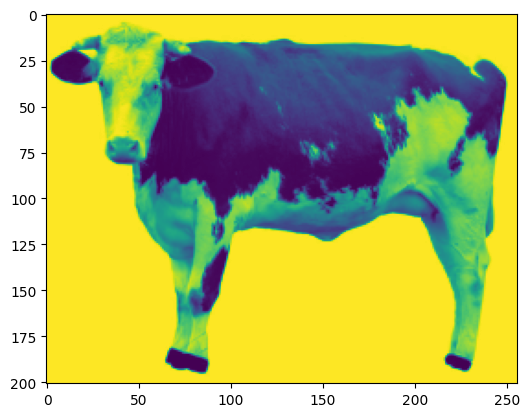

In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, exposure
import imutils

template_image = color.rgb2gray(cv2.imread('template.jpg'))
template_image = imutils.resize(template_image,width=256)
plt.imshow(template_image)
plt.show()

In [47]:
#Tunable parameters
sobel = np.array([[-1, 0, 1]])
cell_size = 8
nbins = 9
block_size = 2

# Function to apply convolution manually
def convolve(image, kernel):
    # Get image dimensions
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Calculate the padding
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Pad the image with zeros
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)

    # Initialize output image
    output = np.zeros((image_height, image_width))

    # Perform convolution
    for i in range(image_height):
        for j in range(image_width):
            # Apply the kernel to the current region of the image
            region = padded_image[i:i + kernel_height, j:j + kernel_width]
            # Apply the kernel to the region (element-wise multiplication and sum)
            output[i, j] = np.sum(region * kernel)

    return output

In [48]:
def hog_feature_extraction(image, sobel, cell_size, nbins, block_size):
    # Compute gradients using Sobel filters
    grad_x = convolve(image, sobel)  # Horizontal gradient
    grad_y = convolve(image, sobel.T)  # Vertical gradient

    # Compute gradient magnitude and orientation
    magnitude = np.sqrt(grad_x**2 + grad_y**2)
    orientation = np.arctan2(grad_y, grad_x)

    # Convert orientation to degrees and shift to [0, 180] range
    orientation = np.degrees(orientation) % 180

    # Calculate number of cells
    height, width = image.shape
    cells_per_row = width // cell_size
    cells_per_col = height // cell_size

    # Calculate bin size in degrees
    bin_size = 180.0 / nbins

    # Initialize histogram array
    histograms = np.zeros((cells_per_col, cells_per_row, nbins))

    # Compute cell histograms
    for i in range(cells_per_col):
        for j in range(cells_per_row):
            # Extract cell gradients
            cell_magnitude = magnitude[i*cell_size:(i+1)*cell_size,
                                    j*cell_size:(j+1)*cell_size]
            cell_orientation = orientation[i*cell_size:(i+1)*cell_size,
                                        j*cell_size:(j+1)*cell_size]

            # Compute histogram for the cell
            for m in range(cell_size):
                for n in range(cell_size):
                    ori = cell_orientation[m, n]
                    mag = cell_magnitude[m, n]

                    # Calculate bin indices and weights
                    bin_index = int(ori // bin_size)
                    if bin_index == nbins:  # Handle edge case
                        bin_index = nbins - 1

                    # Add weighted magnitude to histogram
                    histograms[i, j, bin_index] += mag

    # Compute blocks
    blocks_per_row = cells_per_row - block_size + 1
    blocks_per_col = cells_per_col - block_size + 1
    hog_features = []

    # Normalize blocks
    for i in range(blocks_per_col):
        for j in range(blocks_per_row):
            # Concatenate histograms from the block
            block_hist = histograms[i:i+block_size, j:j+block_size, :].ravel()

            # Normalize the block histogram (L2-norm)
            norm = np.sqrt(np.sum(block_hist**2) + 1e-10)  # Add small constant to avoid division by zero
            normalized_block = block_hist / norm

            hog_features.extend(normalized_block)

    # Convert list to numpy array
    hog_features = np.array(hog_features)

    return histograms, hog_features

template_histograms , template_hog_features = hog_feature_extraction(template_image,sobel,cell_size,nbins,block_size)

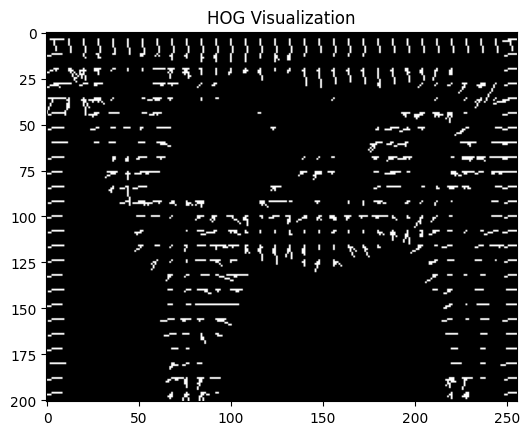

In [49]:
# Visualize HOG as arrows on the image
def visualize_hog(image, histograms, cell_size, nbins):

    # Create an image to overlay arrows
    hog_image = np.zeros_like(image)
    angles = np.linspace(0, np.pi, nbins, endpoint=False)

    for i in range(histograms.shape[0]):
        for j in range(histograms.shape[1]):
            cell_hist = histograms[i, j,:]
            center_y = i * cell_size + cell_size // 2
            center_x = j * cell_size + cell_size // 2

             # Iterate through each cell and plot gradient directions as arrows
            for bin_idx, magnitude in enumerate(cell_hist):
                if magnitude > 1:
                    angle = angles[bin_idx]
                    # Compute arrow direction and magnitude
                    dx = np.cos(angle) * magnitude
                    dy = np.sin(angle) * magnitude
                    # Plot arrow on hog_image
                    cv2.line(hog_image, (center_x, center_y),(int(center_x + dx), int(center_y + dy)), 255, 1)

    # Display the image with arrows
    plt.imshow(hog_image, cmap='gray')
    plt.title("HOG Visualization")
    plt.show()

visualize_hog(template_image, template_histograms, cell_size, nbins)

# Object Detection using HOG
We can use HOG to extract features from a photo and then using the HOG of a template photo that we have from before, perform the object detection.

## HOG pyramid
In order to make the model invariant to changes in the object size we make use of HOG pyramid. In this process we make a list of template HOG using different scales of the template.

## Steps for Object Detection using HOG and Sliding Window
#### Template HOG Feature Extraction:
- Extract the HOG features of the template image (your human template) that you will use for comparison.
#### Sliding Window:
- Apply a sliding window over the target image at multiple scales. This window will move over the image, capturing different regions for comparison with the template.
- Each window size should match the dimensions of your template image, and you'll need to scan through the target image using a small step size (stride).
#### Image Pyramid:
- To account for objects at different scales in the target image, you will create an image pyramid.
- At each level of the pyramid, the image is resized (scaled down), allowing the sliding window to scan objects at various sizes.
#### HOG Feature Extraction for Each Window:
- For each window (at each scale), extract HOG features and compare them with the pre-extracted HOG features of the template image.
#### Comparison and Scoring:
- Compute a similarity score (e.g., using dot products or distance metrics like Euclidean distance) between the HOG features of the template and the sliding window.
- If the score exceeds a certain threshold, you can consider the object detected at that location and scale.
#### Choose the detection with maximum score:
- As the sliding window may detect the same object multiple times (at overlapping positions and scales), you should filter out redundant detections and keep the best one.

In [50]:
import imutils

# Defining the pyramid
def pyramid(image, scale=1.5, minSize=(30, 30)):
    yield image

    while True:
        #create image with different scales
        image = imutils.resize(image, width=int(image.shape[1] / scale))

        if image.shape[0] < minSize[1] or image.shape[1] < minSize[0]:
            break

        yield image

In [51]:
# Defining the sliding window
def sliding_window(image, step_size, window_size):
    for y in range(0, image.shape[0] - window_size[1], step_size):
        for x in range(0, image.shape[1] - window_size[0], step_size):
            yield (x, y, image[y:y + window_size[1], x:x + window_size[0]])

In [52]:
#Tune the parameters
step_size = 16
scale = 1.5
threshold = 0.3
# Detection function
def detect_objects(image, template_hog, template_size, step_size=4, scale=1.5, threshold=0.5):
    detections = []
    for resized in pyramid(image, scale=scale):
        plt.imshow(resized)
        ax = plt.gca()
        draw = False
        for (x, y, window) in sliding_window(resized, step_size=step_size, window_size=template_size):
            _, window_hog = hog_feature_extraction(window, sobel, cell_size, nbins, block_size)

            window_hog = np.ravel(window_hog)
            template_hog = np.ravel(template_hog)

            score = np.dot(window_hog, template_hog) / (np.linalg.norm(window_hog) * np.linalg.norm(template_hog) + 1e-6)

            if score > threshold:
                #append the x , y , score , and resized.shape to detections
                #draw a rectangle to indicate the detected area
                detections.append((x, y, score, resized.shape))
                rect = plt.Rectangle((x, y), template_size[0], template_size[1], edgecolor='r', facecolor='none')
                ax.add_patch(rect)
                draw = True
        if draw:
            plt.show()

    return detections

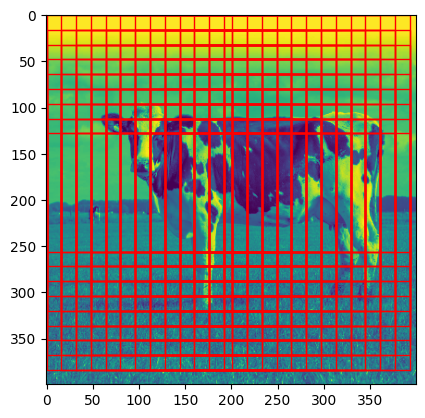

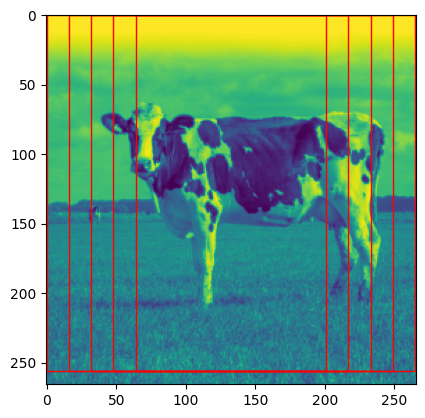

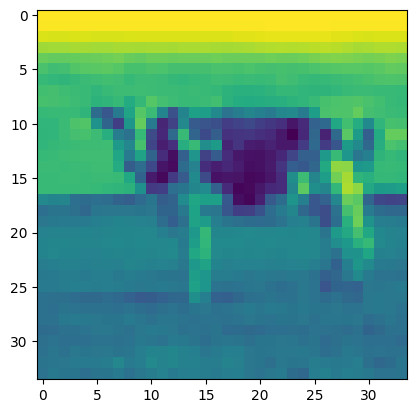

In [53]:
target_image = color.rgb2gray(cv2.imread('target.jpg'))
target_image = imutils.resize(target_image,width=400)

detections = detect_objects(target_image, template_hog_features, template_image.shape, step_size, scale, threshold)

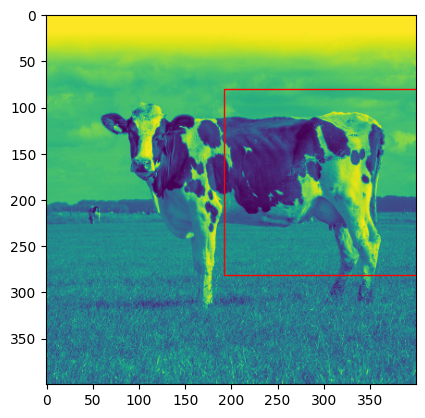

In [55]:
#Find the best window for detection and plot it
if len(detections) > 0:
    best_window = max(detections, key=lambda x: x[2])
    x, y, score, shape = best_window

    plt.imshow(target_image)
    plt.gca().add_patch(plt.Rectangle((x, y), template_image.shape[1], template_image.shape[0], edgecolor='r', facecolor='none'))
    plt.show()
else:
    best_window = None

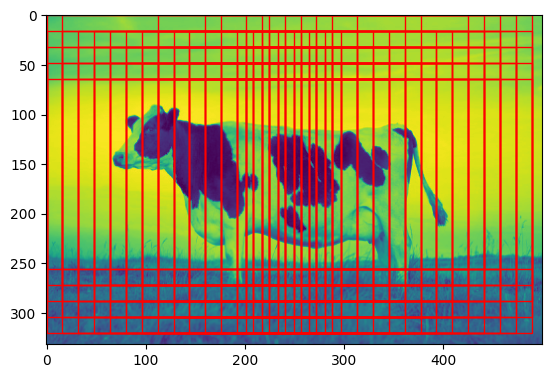

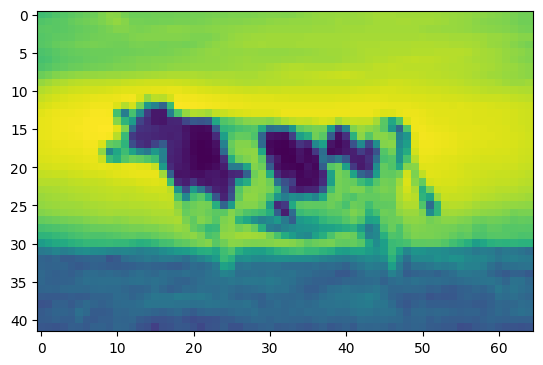

In [56]:
target_image = color.rgb2gray(cv2.imread('target2.jpg'))
target_image = imutils.resize(target_image,width=500)

detections = detect_objects(target_image, template_hog_features, template_image.shape, step_size, scale, threshold)

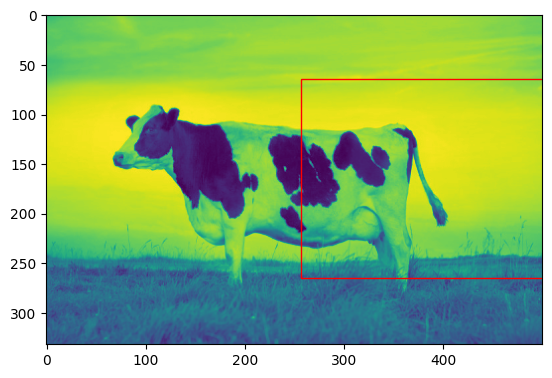

In [57]:
#Find the best window for detection and plot it
if len(detections) > 0:
    best_window = max(detections, key=lambda x: x[2])
    x, y, score, shape = best_window

    plt.imshow(target_image)
    plt.gca().add_patch(plt.Rectangle((x, y), template_image.shape[1], template_image.shape[0], edgecolor='r', facecolor='none'))
    plt.show()
else:
    best_window = None

In completing this exercise, I utilized **ChatGPT** for guidance and support.